This code has been run on the local (VS code).

# Initialize

## Import section

In [38]:
import scipy.io
from scipy.stats.stats import ttest_ind,ranksums
import numpy as np
import glob
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut,KFold
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import KernelPCA,PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import networkx as nx
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.naive_bayes import GaussianNB
import math
from sklearn.metrics import precision_recall_fscore_support
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

C:\Users\rohel\AppData\Local\Temp\ipykernel_3952\4123678258.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import ttest_ind,ranksums
C:\Users\rohel\AppData\Local\Temp\ipykernel_3952\4123678258.py:2: DeprecationWarning: Please use `ranksums` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import ttest_ind,ranksums


## Define some constants

In [39]:
save_plot=True
save_edge=True
con_type='dDTF'
n_top=30
n_avg=2
condition=''
# base_path='/home/mohammadreza/T&N/Thesis/Paper from thesis_2/ByPython/'
base_path="E:\\MohammadReza\\Uni\\Cognitive Science\\Thesis MohammadReza\\Thesis\\Paper from thesis_2\\ByPython\\"
print(base_path)
path= base_path + 'connectivities_mat_files/'
save_path= base_path + 'save/'
save_fig= base_path + 'figure/'

models=['svm','lda','rf','dt']
bands=['delta','theta','alpha','beta','gamma','top150']

index_arr = [["delta", "theta", "alpha", "beta", "gamma",'top150'], ["svm", "lda","rf","dt"]]

# creating dataframe of 'results' for each model, each freq. band and two conditions: with FS(feature selection) and without FS
index = pd.MultiIndex.from_product(index_arr, names=["Band", "Model"])
col_arr=[["Without FS", "With FS"],["Accuracy", "Precision","Recall","F1-Measure"]]
col_index=pd.MultiIndex.from_product(col_arr, names=[" ", " "])

results=pd.DataFrame(np.nan,index=index,columns=col_index)
results=results.astype(str)

E:\MohammadReza\Uni\Cognitive Science\Thesis MohammadReza\Thesis\Paper from thesis_2\ByPython\


## Define some functions

### Classifiers functions

In [54]:
def lda(df,print_results=True):
    import time
    start_time = time.time()
    data=df.to_numpy()
    X=data[:,:-1]
    y=data[:,-1] # extract last column of data as the 'label'
    kf = KFold(n_splits=7,shuffle=True,random_state=0)
    all_acc=[]
    all_precision=[]
    all_recall=[]
    all_f1=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scaler = StandardScaler()
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.transform(X_test)
        clf = LinearDiscriminantAnalysis(solver='lsqr')
        clf.fit(X_train, y_train)
        precision, recall, f1, _=precision_recall_fscore_support(y_test, clf.predict(X_test), average='binary')
        all_acc.append(accuracy_score(y_test,clf.predict(X_test)))
        all_precision.append(precision)
        all_recall.append(recall)
        all_f1.append(f1)
    # results
    all_acc=np.array(all_acc)
    all_precision=np.array(all_precision)
    all_recall=np.array(all_recall)
    all_f1=np.array(all_f1)
    if print_results:
        print("Accuracy LDA: ",all_acc.mean())
    print(f"Time taken for iteration lda: {time.time() - start_time:.4f} seconds")
    return all_acc, all_precision, all_recall, all_f1

In [4]:
def svm_mean_kfold(df,print_results=True):
    data=df.to_numpy()
    X=data[:,:-1]
    y=data[:,-1]
    kf = KFold(n_splits=7,shuffle=True,random_state=0)
    all_acc=[]
    all_precision=[]
    all_recall=[]
    all_f1=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scaler = StandardScaler()
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.transform(X_test)
        clf = SVC(random_state=0, probability=True)
        clf.fit(X_train, y_train)
        precision, recall, f1, _=precision_recall_fscore_support(y_test, clf.predict(X_test), average='binary')
        all_acc.append(accuracy_score(y_test,clf.predict(X_test)))

    # results
    all_acc=np.array(all_acc)
    return all_acc.mean()

In [55]:
def svm(df,print_results=True):
    import time
    start_time = time.time()
    data=df.to_numpy()
    X=data[:,:-1]
    y=data[:,-1]
    kf = KFold(n_splits=7,shuffle=True,random_state=0)
    all_acc=[]
    all_precision=[]
    all_recall=[]
    all_f1=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scaler = StandardScaler()
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.transform(X_test)
        clf = SVC(random_state=0, probability=True)
        clf.fit(X_train, y_train)
        precision, recall, f1, _=precision_recall_fscore_support(y_test, clf.predict(X_test), average='binary')
        all_acc.append(accuracy_score(y_test,clf.predict(X_test)))
        all_precision.append(precision)
        all_recall.append(recall)
        all_f1.append(f1)
    # results
    all_acc=np.array(all_acc)
    all_precision=np.array(all_precision)
    all_recall=np.array(all_recall)
    all_f1=np.array(all_f1)
    if print_results:
        print("Accuracy SVM: ",all_acc.mean())
    print(f"Time taken for iteration svm: {time.time() - start_time:.4f} seconds")
    return all_acc, all_precision, all_recall, all_f1

In [56]:
def rf(df,print_results=True): # random forest
    import time
    start_time = time.time()
    data=df.to_numpy()
    X=data[:,:-1]
    y=data[:,-1]
    kf = KFold(n_splits=7,shuffle=True,random_state=0)
    all_acc=[]
    all_precision=[]
    all_recall=[]
    all_f1=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = RandomForestClassifier(random_state=0)
        clf.fit(X_train, y_train)
        precision, recall, f1, _=precision_recall_fscore_support(y_test, clf.predict(X_test), average='binary')
        all_acc.append(accuracy_score(y_test,clf.predict(X_test)))
        all_precision.append(precision)
        all_recall.append(recall)
        all_f1.append(f1)
    # results
    all_acc=np.array(all_acc)
    all_precision=np.array(all_precision)
    all_recall=np.array(all_recall)
    all_f1=np.array(all_f1)
    if print_results:
        print("Accuracy RF: ",all_acc.mean())
    print(f"Time taken for iteration rf: {time.time() - start_time:.4f} seconds")
    return all_acc, all_precision, all_recall, all_f1

In [57]:
def dt(df,print_results=True): # decision tree
    import time
    start_time = time.time()
    data=df.to_numpy()
    X=data[:,:-1]
    y=data[:,-1]
    kf = KFold(n_splits=7,shuffle=True,random_state=0)
    all_acc=[]
    all_precision=[]
    all_recall=[]
    all_f1=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = DecisionTreeClassifier(random_state=0,
                                    criterion='entropy', max_depth=22, min_samples_leaf=8)
        clf.fit(X_train, y_train)
        precision, recall, f1, _=precision_recall_fscore_support(y_test, clf.predict(X_test), average='binary')
        all_acc.append(accuracy_score(y_test,clf.predict(X_test)))
        all_precision.append(precision)
        all_recall.append(recall)
        all_f1.append(f1)
    # results
    all_acc=np.array(all_acc)
    all_precision=np.array(all_precision)
    all_recall=np.array(all_recall)
    all_f1=np.array(all_f1)
    if print_results:
        print("Accuracy DT: ",all_acc.mean())
    print(f"Time taken for iteration dt: {time.time() - start_time:.4f} seconds")
    return all_acc, all_precision, all_recall, all_f1

In [58]:
def lr(df):  #logestic regression
    data=df.to_numpy()
    X=data[:,:-1]
    y=data[:,-1]
    kf = KFold(n_splits=7,shuffle=True,random_state=0)
    all_auc=[]
    all_acc=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scaler = StandardScaler()
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.transform(X_test)
        clf = LogisticRegression()
        clf.fit(X_train, y_train)
        all_acc.append(accuracy_score(y_test,clf.predict(X_test)))
        all_auc.append(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]))
    # results
    all_auc=np.array(all_auc).mean()
    all_acc=np.array(all_acc).mean()
#     print("Accuracy LR: ",all_acc)
#     print("AUC LR: ",all_auc)
    return all_acc, all_auc

In [9]:
def rf_with_fs(df): #random forest with feature selection (top n features (n=30))
    ls_feature=list(df.columns[:-1])
    best_acc=-np.inf
    selected_features=[]
    best_feature=None
    df_results=pd.DataFrame([])
    c=0
    for n_comb in range(len(ls_feature)):
        best_current=0
        acc_current=None
        feature_current=None
        to_be_selected=None
        for feature in ls_feature:
            selected_features.append(feature)
            acc_current, _, _, _=rf(df[selected_features+['label']],print_results=False)
            acc_current=acc_current.mean()
            df_results=df_results.append({'Features':n_comb,'Accouracy':acc_current},ignore_index=True)
#             print(selected_features)
            if best_current<acc_current:
                best_current=acc_current
                to_be_selected=feature
            selected_features.remove(feature)
        selected_features.append(to_be_selected)
        ls_feature.remove(to_be_selected)
        if best_acc<best_current:
            best_acc=best_current
            best_feature=selected_features[:]
            c+=1
            print(f"feature{c}: {to_be_selected}")
            print("ACC Updated:",best_acc)
    with open(save_path+'rf_with_fs_best_feature', 'wb') as file_pi1:
        pickle.dump(best_feature, file_pi1)
    with open(save_path+'rf_with_fs_df_results', 'wb') as file_pi1:
        pickle.dump(df_results, file_pi1)
    return best_feature,df_results

In [10]:
def lda_with_fs(df):
    ls_feature=list(df.columns[:-1])
    best_acc=-np.inf
    selected_features=[]
    best_feature=None
    df_results=pd.DataFrame([])
    c=0
    for n_comb in range(len(ls_feature)):
        best_current=0
        acc_current=None
        feature_current=None
        to_be_selected=None
        for feature in ls_feature:
            selected_features.append(feature)
            acc_current, _, _, _=lda(df[selected_features+['label']],print_results=False)
            acc_current=acc_current.mean()
            df_results=df_results.append({'Features':n_comb,'Accouracy':acc_current},ignore_index=True)
#             print(selected_features)
            if best_current<acc_current:
                best_current=acc_current
                to_be_selected=feature
            selected_features.remove(feature)
        selected_features.append(to_be_selected)
        ls_feature.remove(to_be_selected)
        if best_acc<best_current:
            best_acc=best_current
            best_feature=selected_features[:]
            c+=1
            print(f"feature{c}: {to_be_selected}")
            print("ACC Updated:",best_acc)
    with open(save_path+'lda_with_fs_best_feature', 'wb') as file_pi1:
        pickle.dump(best_feature, file_pi1)
    with open(save_path+'lda_with_fs_df_results', 'wb') as file_pi1:
        pickle.dump(df_results, file_pi1)
    return best_feature,df_results

In [11]:
def dt_with_fs(df):
    ls_feature=list(df.columns[:-1])
    best_acc=-np.inf
    selected_features=[]
    best_feature=None
    df_results=pd.DataFrame([])
    c=0
    for n_comb in range(len(ls_feature)):
        best_current=0
        acc_current=None
        feature_current=None
        to_be_selected=None
        for feature in ls_feature:
            selected_features.append(feature)
            acc_current, _, _, _=dt(df[selected_features+['label']],print_results=False)
            acc_current=acc_current.mean()
            df_results=df_results.append({'Features':n_comb,'Accouracy':acc_current},ignore_index=True)
#             print(selected_features)
            if best_current<acc_current:
                best_current=acc_current
                to_be_selected=feature
            selected_features.remove(feature)
        selected_features.append(to_be_selected)
        ls_feature.remove(to_be_selected)
        if best_acc<best_current:
            best_acc=best_current
            best_feature=selected_features[:]
            c+=1
            print(f"feature{c}: {to_be_selected}")
            print("ACC Updated:",best_acc)
    with open(save_path+'dt_with_fs_best_feature', 'wb') as file_pi1:
        pickle.dump(best_feature, file_pi1)
    with open(save_path+'dt_with_fs_df_results', 'wb') as file_pi1:
        pickle.dump(df_results, file_pi1)
    return best_feature,df_results

In [12]:
def svm_with_fs(df):
    ls_feature=list(df.columns[:-1])
    best_acc=-np.inf
    selected_features=[]
    best_feature=None
    df_results=pd.DataFrame([])
    c=0
    for n_comb in range(len(ls_feature)):
        best_current=0
        acc_current=None
        feature_current=None
        to_be_selected=None
        for feature in ls_feature:
            selected_features.append(feature)
            acc_current, _, _, _=svm(df[selected_features+['label']],print_results=False)
            acc_current=acc_current.mean()
            df_results=df_results.append({'Features':n_comb,'Accouracy':acc_current},ignore_index=True)
#             print(selected_features)
            if best_current<acc_current:
                best_current=acc_current
                to_be_selected=feature
            selected_features.remove(feature)
        selected_features.append(to_be_selected)
        ls_feature.remove(to_be_selected)
        if best_acc<best_current:
            best_acc=best_current
            best_feature=selected_features[:]
            c+=1
            print(f"feature{c}: {to_be_selected}")
            print("ACC Updated:",best_acc)
    with open(save_path+'svm_with_fs_best_feature', 'wb') as file_pi1:
        pickle.dump(best_feature, file_pi1)
    with open(save_path+'svm_with_fs_df_results', 'wb') as file_pi1:
        pickle.dump(df_results, file_pi1)
    return best_feature,df_results

### Other functions

In [13]:
def read_mat(path, freq_band='alpha'):
    number_of_segments=37
    number_of_users=48
    hi_counter=0
    lo_counter=0
    hi_data=np.zeros((number_of_users*number_of_segments,14,14)) # sub=48, win_num=37
    lo_data=np.zeros((number_of_users*number_of_segments,14,14))
    for subject_number in range(number_of_users):
      for segment in range(number_of_segments):
        path_subejct = path + "dDTF_s" + str(subject_number+1) + "_hi_" + freq_band + str(segment+1) + ".mat"
        ddtf=scipy.io.loadmat(path_subejct)['needToSave'] # needToSave is name of variable that I set for .mat files. In this case after loading .mat files by loadmat, data is a dictionary that data are in value part of key=needToSave (you can print value of ddtf and check this.)
        hi_data[hi_counter,:,:]=ddtf
        hi_counter+=1
      for segment in range(number_of_segments):
        path_subejct = path + "dDTF_s" + str(subject_number+1) + "_lo_" + freq_band + str(segment+1) + ".mat"
        ddtf=scipy.io.loadmat(path_subejct)['needToSave']
        lo_data[lo_counter,:,:]=ddtf
        lo_counter+=1
    return hi_data, lo_data

In [14]:
# plot connectivity matrix

def plot_mean_index(mean_index, label, vmin, vmax, save_path, save_plot=False,cmap='jet'):
    df_p_value = pd.DataFrame(mean_index, columns=label, index=label)
    f = sns.heatmap(df_p_value, cmap=cmap, vmin=vmin, vmax=vmax)
    # cbar = f.collections[0].colorbar
    # cbar.set_ticks([1, 30])
    # cbar.set_ticklabels(['Rank 30', 'Rank1'])
    if save_plot:
        f.figure.savefig(save_path + ".png", dpi=600)
    plt.show()

In [15]:
# # generating connectivity images with channels' label and diag equal to zero for reporting purpose.
# subject_number = 16
# np.fill_diagonal(lo_alpha[subject_number], 0)
# np.fill_diagonal(hi_alpha[subject_number], 0)
# np.fill_diagonal(lo_beta[subject_number], 0)
# np.fill_diagonal(hi_beta[subject_number], 0)
# np.fill_diagonal(lo_delta[subject_number], 0)
# np.fill_diagonal(hi_delta[subject_number], 0)
# np.fill_diagonal(lo_theta[subject_number], 0)
# np.fill_diagonal(hi_theta[subject_number], 0)
# np.fill_diagonal(lo_gamma[subject_number], 0)
# np.fill_diagonal(hi_gamma[subject_number], 0)

# plot_mean_index(lo_alpha[subject_number],label,np.nanmin(lo_alpha[subject_number]),np.nanmax(lo_alpha[subject_number]),save_path,save_plot)
# plot_mean_index(hi_alpha[subject_number],label,np.nanmin(hi_alpha[subject_number]),np.nanmax(hi_alpha[subject_number]),save_path,save_plot)

# plot_mean_index(lo_beta[subject_number],label,np.nanmin(lo_beta[subject_number]),np.nanmax(lo_beta[subject_number]),save_path,save_plot)
# plot_mean_index(hi_beta[subject_number],label,np.nanmin(hi_beta[subject_number]),np.nanmax(hi_beta[subject_number]),save_path,save_plot)

# plot_mean_index(lo_delta[subject_number],label,np.nanmin(lo_delta[subject_number]),np.nanmax(lo_delta[subject_number]),save_path,save_plot)
# plot_mean_index(hi_delta[subject_number],label,np.nanmin(hi_delta[subject_number]),np.nanmax(hi_delta[subject_number]),save_path,save_plot)

# plot_mean_index(lo_theta[subject_number],label,np.nanmin(lo_theta[subject_number]),np.nanmax(lo_theta[subject_number]),save_path,save_plot)
# plot_mean_index(hi_theta[subject_number],label,np.nanmin(hi_theta[subject_number]),np.nanmax(hi_theta[subject_number]),save_path,save_plot)

# plot_mean_index(lo_gamma[subject_number],label,np.nanmin(lo_gamma[subject_number]),np.nanmax(lo_gamma[subject_number]),save_path,save_plot)
# plot_mean_index(hi_gamma[subject_number],label,np.nanmin(hi_gamma[subject_number]),np.nanmax(hi_gamma[subject_number]),save_path,save_plot)

NameError: name 'lo_alpha' is not defined

In [41]:
# این متود میاد یک سلول(براساس ایندکس ک میگیره) از ماتریسهای ۱۴*۱۴ رو برمیداره و میزاره زیره هم و لیبل کلاسشون رو هم میزنه. ینی خروجی این متود یه دیتافریمه که دوتا ستون داره یکی دیتای مربوط به هر سلول از
#کانکتیویتی و یه ستون دیگه مربوط به لیبل اون دیتا. همچنین چون هر فایلی که میاد ۸۸۸تا رکورد داره دوتارو ک میزاره زیر هم میشه ۱۷۷۶تا رکورد پس خروجی یه جدول با ۲ستون و ۱۷۷۶تا رکورده
# ینی خروجی این متود میشه دیتای آماده واسه ترین کردن یه مدل لرنینگ ب ازای یه ارتباط
def prepare_data(indices,np_hi,np_lo,col_name=None):
    np_hi=pd.DataFrame(np_hi.reshape(np_hi.shape[0],-1)[:,indices]) # initial_shape: (888, 14, 14) --- result_shape: (888, 1)
    np_lo=pd.DataFrame(np_lo.reshape(np_lo.shape[0],-1)[:,indices])
    np_hi['label']=1 # shape: (888, 2)
    np_lo['label']=0
    df_data=pd.concat([np_hi,np_lo],axis=0,ignore_index=True) #vertically concatenation. result shape: (1776, 2)
    if col_name!=None:
      df_data.set_axis(col_name + ['label'], axis=1, inplace=True)
    return df_data

In [42]:
def connectivity(auc_mat,label,save_path,ntop_features=30,save_edge=False,save_plot=False): # auc_mat=auc_mat_delta.flatten it's shape: (14*14,)=(196,)
    df_con=pd.DataFrame(auc_mat,columns=['auc']) # result's shape: (196,1) - the column got label: 'auc'
    df_con.reset_index(inplace=True) # result's shape: (196,2) - a column added named: index from 0to195
    df_con.rename(columns={'index':'position'},inplace=True) # index column renamed to: position
    df_con['x']=df_con['position']//14 # result's shape: (196,3) - a column added named: x from 0to13 that is quotient of 14
    df_con['y']=df_con['position']%14 # result's shape: (196,4) - a column added named: y from 0to13 that is reminder of 14
    df_con=df_con.sort_values('auc',ascending=False,ignore_index=True).reset_index() # result's shape: (196,5) - a column added named: index from 0to195 - rows are sorted desc by 'auc' column
    df_con.rename(columns={'index':'rank'},inplace=True) # index column renamed to: rank
    df_con=df_con.iloc[:ntop_features] # select top 30 rows (features) - result's shape: (30, 5)
    conn_mat=np.zeros((14*14))
    conn_mat[df_con['position']]=df_con['auc'] # based on position's value, set value of auc to conn_mat and then reshape conn_mat to: (14, 14)
    conn_mat=conn_mat.reshape(14,14)
    conn_mat[conn_mat==0]=np.nan
    plot_mean_index(conn_mat,label,np.nanmin(conn_mat),np.nanmax(conn_mat),save_path,save_plot)
    if save_edge:
        conn_mat=np.where(np.isnan(conn_mat),int(0),conn_mat)
        np.savetxt(r''+ save_path + '.edge', conn_mat.T, delimiter='\t')
    return np.where(np.isnan(conn_mat),0,conn_mat) # result's shape: (14,14) - result is a 14,14 matrix that only top-30-auc-based connectivities has value.

In [18]:
def p_value(hi,lo):
  p_mat=np.zeros((14,14))
  for i in range(14):
    for j in range(14):
      stat,p=ttest_ind(hi[:,i,j],lo[:,i,j])
      p_mat[i,j]=p
  return p_mat

In [19]:
def get_min(data):
  min_value=np.inf
  for n in range(data.shape[0]):
    for i in range(data.shape[1]):
      for j in range(data.shape[2]):
        if i==j:
          continue
        if data[n,i,j] < min_value:
          min_value = data[n,i,j]
  return min_value

In [20]:
def get_max(data):
    max_value=-np.inf
    for n in range(data.shape[0]):
        for i in range(data.shape[1]):
            for j in range(data.shape[2]):
                if i==j:
                    continue
                if data[n,i,j] > max_value:
                    max_value = data[n,i,j]
        return max_value

In [21]:
def min_max_two_group(group_one, group_two):

    min_one = get_min(group_one)
    min_two = get_min(group_two)

    if min_one <= min_two:
        min_value = min_one
    else:
        min_value = min_two

    max_one = get_max(group_one)
    max_two = get_max(group_two)

    if max_one >= max_two:
        max_value = max_one
    else:
        max_value = max_two

    return min_value, max_value

In [22]:
def normalization(data, min_value, max_value):
    zero_diag=1-np.eye(14,14)
    data=(data-min_value)/(max_value-min_value)
    for i in range(data.shape[0]):
        data[i,:,:]=data[i,:,:]*zero_diag
    return data

In [23]:
def top_n_value(matrix,kth,smallest=True): # what's kth?
    if smallest:
        idx = np.argpartition(matrix, kth)
        matrix[matrix>max(matrix[idx[:kth]])]=np.nan
    else:
        idx = np.argpartition(matrix, -kth)
        matrix[matrix<min(matrix[idx[-kth:]])]=np.nan
    return matrix

In [24]:
def create_df_connectivity(x,y,auc,pval,label,num_connections,sort_by='AUC'): # Create DataFrame connectivity
    data=[]
    for i in range(num_connections):
        data.append([label[int(x[i])]] + [label[int(y[i])]]+ [(auc[int(x[i]),int(y[i])])] + [pval[int(x[i]),int(y[i])]])
    df=pd.DataFrame(data,columns=['From','To','AUC','P value'])
    if sort_by=='AUC':
        df=df.sort_values(sort_by,ascending=False,ignore_index=True)
    else:
        df=df.sort_values(sort_by,ascending=True,ignore_index=True)
    return df

In [25]:
def num_tree(data):
    ensemble_clfs = [ ("RandomForestClassifier, max_features=None",RandomForestClassifier(warm_start=True, max_features=None, oob_score=True,))]

    error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

    min_estimators = 10
    max_estimators = 300

    for label, clf in ensemble_clfs:
        for i in range(min_estimators, max_estimators + 1):
            clf.set_params(n_estimators=i)
            clf.fit(data[:,:-1], data[:,-1])
            oob_error = 1 - clf.oob_score_
            error_rate[label].append((i, oob_error))

    for label, clf_err in error_rate.items():
        xs, ys = zip(*clf_err)
        plt.plot(xs, ys, label=label)

    plt.xlim(min_estimators, max_estimators)
    plt.xlabel("n_estimators")
    plt.ylabel("OOB error rate")
    plt.legend(loc="upper right")
    plt.show()

In [26]:
def plot_results(df_result,path,save_plot=False):
    fig = df_result.boxplot(by='Features',figsize=(30,26)).get_figure()
    fig.savefig(f'{path}.png',dpi=600)

## Load data

In [43]:
# channels' label/name // ????????? at last there is an empty member !!!!!!!!

# with open (base_path + "channels_name.txt", "r") as myfile:
#     label=myfile.read().split(' ')
# print(label)

with open(base_path + "channels_name.txt", "r") as myfile:
    label = myfile.read().split(' ')
    label[-1] = label[-1].strip()  # Remove newline character from the last item

print(label)

['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


In [344]:
# hi_delta, lo_delta = read_mat(path,'delta')
# hi_theta, lo_theta = read_mat(path,'theta')
# hi_alpha, lo_alpha = read_mat(path,'alpha')
# hi_beta, lo_beta = read_mat(path,'beta')
# hi_gamma, lo_gamma = read_mat(path,'gamma')

# print(np.shape(hi_delta))
# print(np.shape(lo_delta))
# print(np.shape(hi_theta))
# print(np.shape(lo_theta))
# print(np.shape(hi_delta))
# print(np.shape(lo_delta))
# print(np.shape(hi_delta))
# print(np.shape(lo_delta))
# print(np.shape(hi_delta))
# print(np.shape(lo_delta))


# with open(base_path+'hi_delta', 'wb') as file_pi1:
#     pickle.dump(hi_delta, file_pi1)
# with open(base_path+'lo_delta', 'wb') as file_pi1:
#     pickle.dump(lo_delta, file_pi1)

# with open(base_path+'hi_theta', 'wb') as file_pi1:
#     pickle.dump(hi_theta, file_pi1)
# with open(base_path+'lo_theta', 'wb') as file_pi1:
#     pickle.dump(lo_theta, file_pi1)

# with open(base_path+'hi_alpha', 'wb') as file_pi1:
#     pickle.dump(hi_alpha, file_pi1)
# with open(base_path+'lo_alpha', 'wb') as file_pi1:
#     pickle.dump(lo_alpha, file_pi1)

# with open(base_path+'hi_beta', 'wb') as file_pi1:
#     pickle.dump(hi_beta, file_pi1)
# with open(base_path+'lo_beta', 'wb') as file_pi1:
#     pickle.dump(lo_beta, file_pi1)

# with open(base_path+'hi_gamma', 'wb') as file_pi1:
#     pickle.dump(hi_gamma, file_pi1)
# with open(base_path+'lo_gamma', 'wb') as file_pi1:
#     pickle.dump(lo_gamma, file_pi1)


In [44]:
import pickle

with open(base_path+'hi_delta', 'rb') as f:
    hi_delta = pickle.load(f)
print(np.shape(hi_delta)) # (1776, 14, 14)
with open(base_path+'lo_delta', 'rb') as f:
    lo_delta = pickle.load(f)
print(np.shape(lo_delta)) # (1776, 14, 14)

with open(base_path+'hi_theta', 'rb') as f:
    hi_theta = pickle.load(f)
print(np.shape(hi_theta)) # (1776, 14, 14)
with open(base_path+'lo_theta', 'rb') as f:
    lo_theta = pickle.load(f)
print(np.shape(lo_theta)) # (1776, 14, 14)

with open(base_path+'hi_alpha', 'rb') as f:
    hi_alpha = pickle.load(f)
print(np.shape(hi_alpha)) # (1776, 14, 14)
with open(base_path+'lo_alpha', 'rb') as f:
    lo_alpha = pickle.load(f)
print(np.shape(lo_alpha)) # (1776, 14, 14)

with open(base_path+'hi_beta', 'rb') as f:
    hi_beta = pickle.load(f)
print(np.shape(hi_beta)) # (1776, 14, 14)
with open(base_path+'lo_beta', 'rb') as f:
    lo_beta = pickle.load(f)
print(np.shape(lo_beta)) # (1776, 14, 14)

with open(base_path+'hi_gamma', 'rb') as f:
    hi_gamma = pickle.load(f)
print(np.shape(hi_gamma)) # (1776, 14, 14)
with open(base_path+'lo_gamma', 'rb') as f:
    lo_gamma = pickle.load(f)
print(np.shape(lo_gamma)) # (1776, 14, 14)

(1776, 14, 14)
(1776, 14, 14)
(1776, 14, 14)
(1776, 14, 14)
(1776, 14, 14)
(1776, 14, 14)
(1776, 14, 14)
(1776, 14, 14)
(1776, 14, 14)
(1776, 14, 14)


## Averaging

In [45]:
# In order to decrease processing and increase accuracy
# averaging every n element
hi_delta=hi_delta.reshape(-1,n_avg,14,14).mean(axis=1)
hi_theta=hi_theta.reshape(-1,n_avg,14,14).mean(axis=1)
hi_alpha=hi_alpha.reshape(-1,n_avg,14,14).mean(axis=1)
hi_beta=hi_beta.reshape(-1,n_avg,14,14).mean(axis=1)
hi_gamma=hi_gamma.reshape(-1,n_avg,14,14).mean(axis=1)

print(np.shape(hi_delta))

(888, 14, 14)


In [46]:
lo_delta=lo_delta.reshape(-1,n_avg,14,14).mean(axis=1)
lo_theta=lo_theta.reshape(-1,n_avg,14,14).mean(axis=1)
lo_alpha=lo_alpha.reshape(-1,n_avg,14,14).mean(axis=1)
lo_beta=lo_beta.reshape(-1,n_avg,14,14).mean(axis=1)
lo_gamma=lo_gamma.reshape(-1,n_avg,14,14).mean(axis=1)

# Feature Selection

## Forward Feature Selection

### Delta

In [48]:
auc_mat_delta = np.zeros(14*14)
for i in range(14*14): # iterate over all cells of a connectivity mat file. // 'i' indicates a connectivity between two channels.
    df = prepare_data(i,(hi_delta),(lo_delta)) #shape df: (1776,2)
    acc,auc=lr(df)
    auc_mat_delta[i]=auc
auc_mat_delta=auc_mat_delta.reshape(14,14) #یه عکس کانکتیویتی از هر دو گروه میگیره و یه ماتریس ۱۴*۱۴ میده که توی هر سلولش مقدار مساحت زیر منحنی اون ارتباط رو گذاشته.

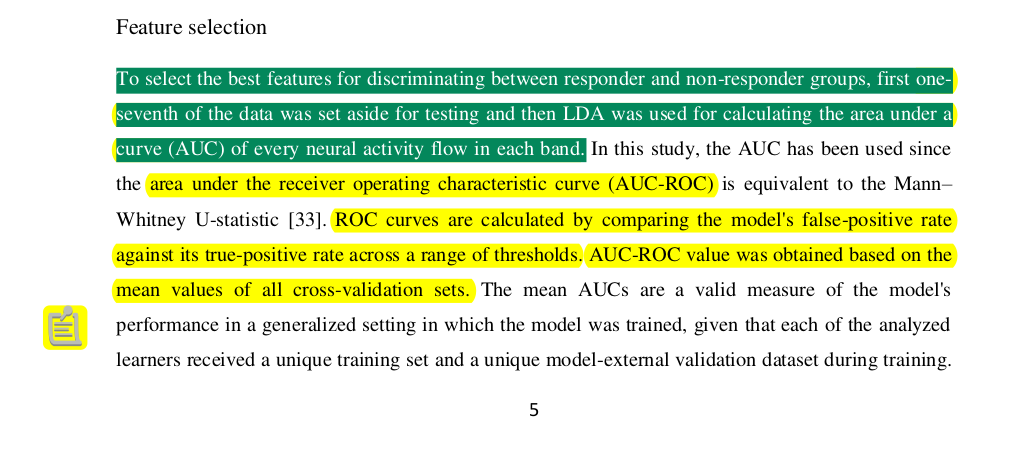

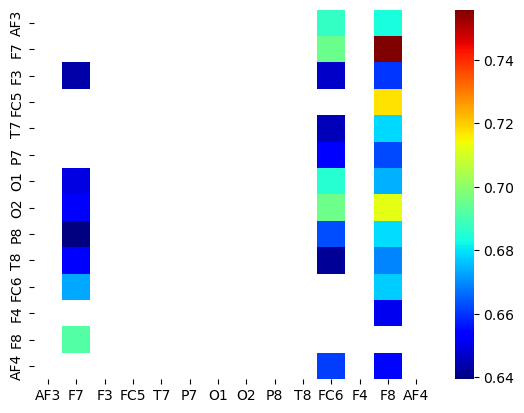

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.68747131 0.
  0.68363896 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.69521983 0.
  0.75579926 0.        ]
 [0.         0.64353871 0.         0.         0.         0.
  0.         0.         0.         0.         0.6469781  0.
  0.66003774 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.71736888 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.64555028 0.
  0.67854224 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.65301788 0.
  0.66248182 0.        ]
 [0.         0.64952418 0.         0.         0.         0.
  0.         0.         0.         0.         0.68552342 0.
  0.674383

In [49]:
con=connectivity(auc_mat_delta.flatten(), label, save_path+'delta_auc', n_top, save_edge=save_edge, save_plot=save_plot) # the result is a (14,14) matrix that only top-30-auc-based indices has value and the value is their auc.
index_delta=np.where(con.flatten()>0)[0]
x=index_delta//14
y=index_delta%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] for i in range(len(x))] # the result is channels' name in n-top connectivities.
print(con)
print(col_name)

In [51]:
df = prepare_data(index_delta,hi_delta,lo_delta,col_name)
display(df) # the result is a dataframe with 30 columns (top-30 connectivities) and 1776 rows

TypeError: set_axis() got an unexpected keyword argument 'inplace'

In [351]:
# # preforming feature selection for every model //////////////////TIME_CONSUMING
# for model in models:
#     exec(f"feature_{model}_delta,df_results_{model}_delta={model}_with_fs(df)")
#     print(10*'-')

In [352]:
# # classification with selected features
# for model in models:
#     exec(f"acc, precision, recall, f1={model}(df[feature_{model}_delta + ['label']])")
#     exec(f"results.loc[('delta','{model}')]['With FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
#     exec(f"results.loc[('delta','{model}')]['With FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
#     exec(f"results.loc[('delta','{model}')]['With FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
#     exec(f"results.loc[('delta','{model}')]['With FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
#     print(10*'-')

In [59]:
import time
# classificaiton with all features
for model in models:
    start_time = time.time()
    exec(f"acc, precision, recall, f1={model}(df)")
    exec(f"results.loc[('delta','{model}')]['Without FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
    exec(f"results.loc[('delta','{model}')]['Without FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
    exec(f"results.loc[('delta','{model}')]['Without FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
    exec(f"results.loc[('delta','{model}')]['Without FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
    print(f"Time taken for iteration {model}: {time.time() - start_time:.4f} seconds")
    print(10*'-')

Accuracy SVM:  0.5484134147263212
Time taken for iteration svm: 4.4335 seconds
Time taken for iteration svm: 4.4335 seconds
----------
Accuracy LDA:  0.5169151286919175
Time taken for iteration lda: 0.0156 seconds
Time taken for iteration lda: 0.0156 seconds
----------
Accuracy RF:  0.5416709274976991
Time taken for iteration rf: 5.0983 seconds
Time taken for iteration rf: 5.1138 seconds
----------
Accuracy DT:  0.5574345202897069
Time taken for iteration dt: 0.0532 seconds
Time taken for iteration dt: 0.0532 seconds
----------


### Theta

In [60]:
auc_mat_theta = np.zeros(14*14)
for i in range(14*14):
    df = prepare_data(i,(hi_theta),(lo_theta))
    acc,auc=lr(df)
    auc_mat_theta[i]=auc
auc_mat_theta=auc_mat_theta.reshape(14,14)

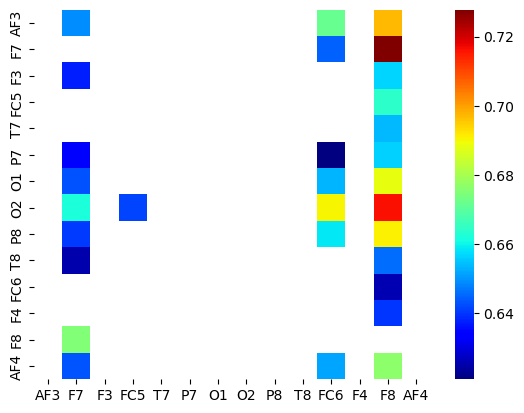

[[0.         0.64903762 0.         0.         0.         0.
  0.         0.         0.         0.         0.67176611 0.
  0.69709008 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.64441816 0.
  0.72775827 0.        ]
 [0.         0.63732358 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.65661336 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.66414277 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.65387147 0.        ]
 [0.         0.6330612  0.         0.         0.         0.
  0.         0.         0.         0.         0.62095328 0.
  0.65606975 0.        ]
 [0.         0.64305915 0.         0.         0.         0.
  0.         0.         0.         0.         0.65342947 0.
  0.688315

In [61]:
con=connectivity(auc_mat_theta.flatten(),label,save_path+'theta_auc',save_edge=save_edge,save_plot=save_plot)
index_theta=np.where(con.flatten()>0)[0]
x=index_theta//14
y=index_theta%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] for i in range(len(x))]

print(con)
print(col_name)

In [62]:
df = prepare_data(index_theta,hi_theta,lo_theta,col_name)

TypeError: set_axis() got an unexpected keyword argument 'inplace'

In [357]:
# # preforming feature selection for every model //////////////////TIME_CONSUMING
# for model in models:
#     exec(f"feature_{model}_theta,df_results_{model}_theta={model}_with_fs(df)")
#     print(10*'-')

In [358]:
# # classification with selected features
# for model in models:
#     exec(f"acc, precision, recall, f1={model}(df[feature_{model}_theta + ['label']])")
#     exec(f"results.loc[('theta','{model}')]['With FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
#     exec(f"results.loc[('theta','{model}')]['With FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
#     exec(f"results.loc[('theta','{model}')]['With FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
#     exec(f"results.loc[('theta','{model}')]['With FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
#     print(10*'-')

In [63]:
# classificaiton with all features
for model in models:
    exec(f"acc, precision, recall, f1={model}(df)")
    exec(f"results.loc[('theta','{model}')]['Without FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
    exec(f"results.loc[('theta','{model}')]['Without FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
    exec(f"results.loc[('theta','{model}')]['Without FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
    exec(f"results.loc[('theta','{model}')]['Without FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
    print(10*'-')

Accuracy SVM:  0.5095813122173958
Time taken for iteration svm: 4.2620 seconds
----------
Accuracy LDA:  0.47185850780510147
Time taken for iteration lda: 0.0312 seconds
----------
Accuracy RF:  0.5095435204986728
Time taken for iteration rf: 6.3831 seconds
----------
Accuracy DT:  0.5061667192786672
Time taken for iteration dt: 0.0676 seconds
----------


### Alpha

In [64]:
auc_mat_alpha = np.zeros(14*14)
for i in range(14*14):
    df = prepare_data(i,(hi_alpha),(lo_alpha))
    acc,auc=lr(df)
    auc_mat_alpha[i]=auc
auc_mat_alpha=auc_mat_alpha.reshape(14,14)

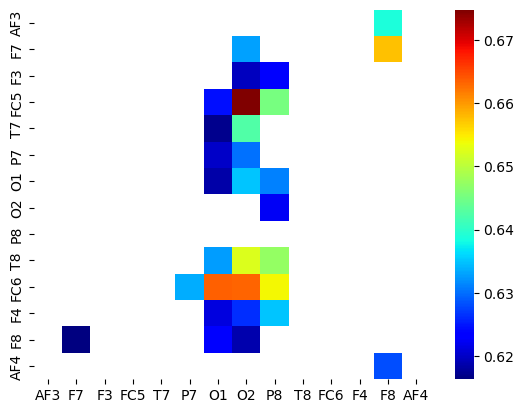

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.63870979 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.63280687 0.         0.         0.         0.
  0.65752173 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.6195466  0.62346346 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.62447742 0.67481238 0.64528359 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.61721158 0.64240436 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.62014611 0.63002549 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.61858622 0.63498459 0.63110909 0.         0.         0.
  0.      

In [65]:
con=connectivity(auc_mat_alpha.flatten(),label,save_path+'alpha_auc',save_edge=save_edge,save_plot=save_plot)
index_alpha=np.where(con.flatten()>0)[0]
x=index_alpha//14
y=index_alpha%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] for i in range(len(x))]

print(con)
print(col_name)

In [39]:
df = prepare_data(index_alpha,hi_alpha,lo_alpha,col_name)

/tmp/ipykernel_46331/2553286665.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_data.set_axis(col_name + ['label'], axis=1, inplace=True)


In [363]:
# # preforming feature selection for every model //////////////////TIME_CONSUMING
# for model in models:
#     exec(f"feature_{model}_alpha,df_results_{model}_alpha={model}_with_fs(df)")
#     print(10*'-')

In [364]:
# # classification with selected features
# for model in models:
#     exec(f"acc, precision, recall, f1={model}(df[feature_{model}_alpha + ['label']])")
#     exec(f"results.loc[('alpha','{model}')]['With FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
#     exec(f"results.loc[('alpha','{model}')]['With FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
#     exec(f"results.loc[('alpha','{model}')]['With FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
#     exec(f"results.loc[('alpha','{model}')]['With FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
#     print(10*'-')

In [66]:
# classificaiton with all features
for model in models:
    exec(f"acc, precision, recall, f1={model}(df)")
    exec(f"results.loc[('alpha','{model}')]['Without FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
    exec(f"results.loc[('alpha','{model}')]['Without FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
    exec(f"results.loc[('alpha','{model}')]['Without FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
    exec(f"results.loc[('alpha','{model}')]['Without FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
    print(10*'-')

Accuracy SVM:  0.5754344936131995
Time taken for iteration svm: 4.2834 seconds
----------
Accuracy LDA:  0.5422044576443754
Time taken for iteration lda: 0.0156 seconds
----------
Accuracy RF:  0.5157702619188412
Time taken for iteration rf: 5.0335 seconds
----------
Accuracy DT:  0.5326475988920357
Time taken for iteration dt: 0.0665 seconds
----------


### Beta

In [67]:
auc_mat_beta = np.zeros(14*14)
for i in range(14*14):
    df = prepare_data(i,(hi_beta),(lo_beta))
    acc,auc=lr(df)
    auc_mat_beta[i]=auc
auc_mat_beta=auc_mat_beta.reshape(14,14)

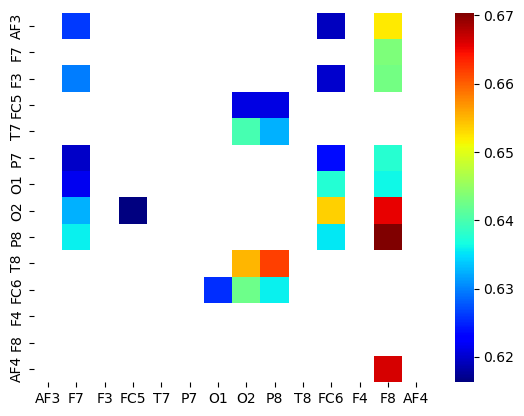

[[0.         0.62600934 0.         0.         0.         0.
  0.         0.         0.         0.         0.61935743 0.
  0.65217195 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.64339496 0.        ]
 [0.         0.62965419 0.         0.         0.         0.
  0.         0.         0.         0.         0.61994156 0.
  0.64280651 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.62107432 0.62093671 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.639834   0.6324767  0.         0.         0.
  0.         0.        ]
 [0.         0.61969613 0.         0.         0.         0.
  0.         0.         0.         0.         0.62351304 0.
  0.63778538 0.        ]
 [0.         0.62176558 0.         0.         0.         0.
  0.         0.         0.         0.         0.63751146 0.
  0.636255

In [68]:
con=connectivity(auc_mat_beta.flatten(),label,save_path+'beta_auc',save_edge=save_edge,save_plot=save_plot)
index_beta=np.where(con.flatten()>0)[0]
x=index_beta//14
y=index_beta%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] for i in range(len(x))]

print(con)
print(col_name)

In [42]:
df = prepare_data(index_beta,hi_beta,lo_beta,col_name)

/tmp/ipykernel_46331/2553286665.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_data.set_axis(col_name + ['label'], axis=1, inplace=True)


In [369]:
# # preforming feature selection for every model //////////////////TIME_CONSUMING
# for model in models:
#     exec(f"feature_{model}_beta,df_results_{model}_beta={model}_with_fs(df)")
#     print(10*'-')

In [370]:
# # classification with selected features
# for model in models:
#     exec(f"acc, precision, recall, f1={model}(df[feature_{model}_beta + ['label']])")
#     exec(f"results.loc[('beta','{model}')]['With FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
#     exec(f"results.loc[('beta','{model}')]['With FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
#     exec(f"results.loc[('beta','{model}')]['With FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
#     exec(f"results.loc[('beta','{model}')]['With FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
#     print(10*'-')

In [69]:
# classificaiton with all features
for model in models:
    exec(f"acc, precision, recall, f1={model}(df)")
    exec(f"results.loc[('beta','{model}')]['Without FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
    exec(f"results.loc[('beta','{model}')]['Without FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
    exec(f"results.loc[('beta','{model}')]['Without FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
    exec(f"results.loc[('beta','{model}')]['Without FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
    print(10*'-')

Accuracy SVM:  0.5270277480137117
Time taken for iteration svm: 4.3536 seconds
----------
Accuracy LDA:  0.48870694522868435
Time taken for iteration lda: 0.0209 seconds
----------
Accuracy RF:  0.5005557605694545
Time taken for iteration rf: 5.6142 seconds
----------
Accuracy DT:  0.5202585842777557
Time taken for iteration dt: 0.0625 seconds
----------


### Gamma

In [70]:
auc_mat_gamma = np.zeros(14*14)
for i in range(14*14):
    df = prepare_data(i,(hi_gamma),(lo_gamma))
    acc,auc=lr(df)
    auc_mat_gamma[i]=auc
auc_mat_gamma=auc_mat_gamma.reshape(14,14)

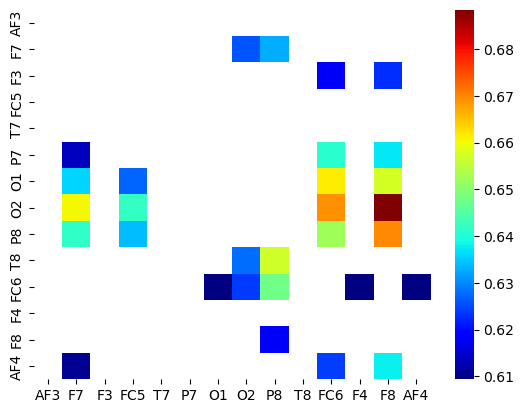

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.62596877 0.63259869 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.6179443  0.
  0.62281634 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.61386273 0.         0.         0.         0.
  0.         0.         0.         0.         0.64089918 0.
  0.63744048 0.        ]
 [0.         0.63569986 0.         0.62701093 0.         0.
  0.         0.         0.         0.         0.66134374 0.
  0.657523

In [71]:
con=connectivity(auc_mat_gamma.flatten(),label,save_path+'gamma_auc',save_edge=save_edge,save_plot=save_plot)
index_gamma=np.where(con.flatten()>0)[0]
x=index_gamma//14
y=index_gamma%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] for i in range(len(x))]

print(con)
print(col_name)

In [45]:
df = prepare_data(index_gamma,hi_gamma,lo_gamma,col_name)

/tmp/ipykernel_46331/2553286665.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_data.set_axis(col_name + ['label'], axis=1, inplace=True)


In [375]:
# # preforming feature selection for every model //////////////////TIME_CONSUMING
# for model in models:
#     exec(f"feature_{model}_gamma,df_results_{model}_gamma={model}_with_fs(df)")
#     print(10*'-')

In [376]:
# # classification with selected features
# for model in models:
#     exec(f"acc, precision, recall, f1={model}(df[feature_{model}_gamma + ['label']])")
#     exec(f"results.loc[('gamma','{model}')]['With FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
#     exec(f"results.loc[('gamma','{model}')]['With FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
#     exec(f"results.loc[('gamma','{model}')]['With FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
#     exec(f"results.loc[('gamma','{model}')]['With FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
#     print(10*'-')

In [72]:
# classificaiton with all features
for model in models:
    exec(f"acc, precision, recall, f1={model}(df)")
    exec(f"results.loc[('gamma','{model}')]['Without FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
    exec(f"results.loc[('gamma','{model}')]['Without FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
    exec(f"results.loc[('gamma','{model}')]['Without FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
    exec(f"results.loc[('gamma','{model}')]['Without FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
    print(10*'-')

Accuracy SVM:  0.5512433475459836
Time taken for iteration svm: 4.2298 seconds
----------
Accuracy LDA:  0.5253315667557367
Time taken for iteration lda: 0.0156 seconds
----------
Accuracy RF:  0.5112463708834815
Time taken for iteration rf: 5.3191 seconds
----------
Accuracy DT:  0.5124023528679469
Time taken for iteration dt: 0.0626 seconds
----------


### Top 150

Delta

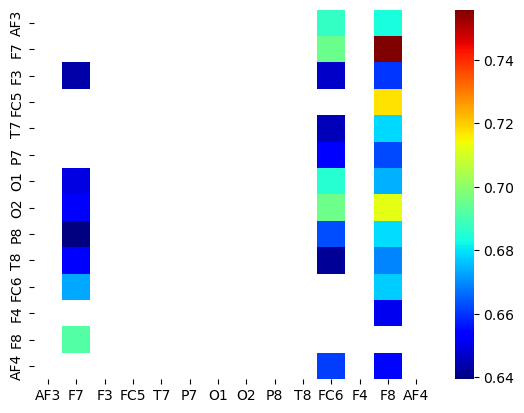

In [37]:
con=connectivity(auc_mat_delta.flatten(),label,save_path+'delta_auc',save_edge=save_edge,save_plot=save_plot)
index_delta=np.where(con.flatten()>0)[0]
x=index_delta//14
y=index_delta%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] +" delta" for i in range(len(x))]

In [38]:
df_delta = prepare_data(index_delta,hi_delta,lo_delta,col_name)
df_delta.drop('label',axis=1,inplace=True)

/tmp/ipykernel_53631/2553286665.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_data.set_axis(col_name + ['label'], axis=1, inplace=True)


Theta

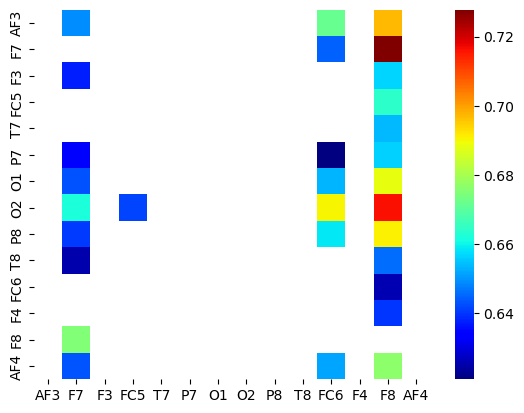

In [39]:
con=connectivity(auc_mat_theta.flatten(),label,save_path+'theta_auc',save_edge=save_edge,save_plot=save_plot)
index_theta=np.where(con.flatten()>0)[0]
x=index_theta//14
y=index_theta%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] +" theta" for i in range(len(x))]

In [40]:
df_theta = prepare_data(index_theta,hi_theta,lo_theta,col_name)
df_theta.drop('label',axis=1,inplace=True)

/tmp/ipykernel_53631/2553286665.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_data.set_axis(col_name + ['label'], axis=1, inplace=True)


Alpha

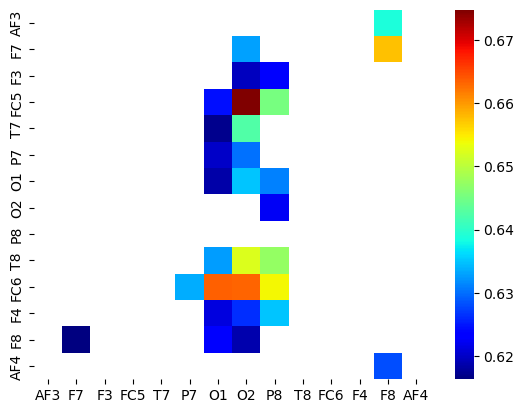

In [41]:
con=connectivity(auc_mat_alpha.flatten(),label,save_path+'alpha_auc',save_edge=save_edge,save_plot=save_plot)
index_alpha=np.where(con.flatten()>0)[0]
x=index_alpha//14
y=index_alpha%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] +" alpha" for i in range(len(x))]

In [42]:
df_alpha = prepare_data(index_alpha,hi_alpha,lo_alpha,col_name)
df_alpha.drop('label',axis=1,inplace=True)

/tmp/ipykernel_53631/2553286665.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_data.set_axis(col_name + ['label'], axis=1, inplace=True)


beta

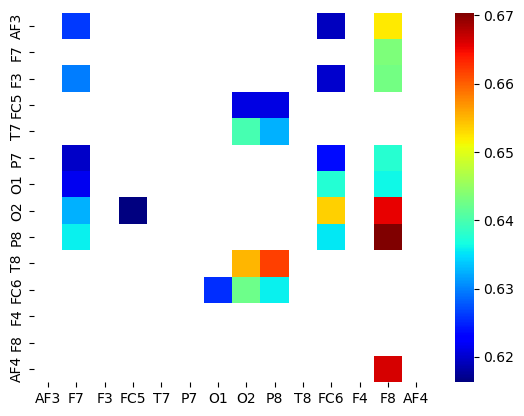

In [43]:
con=connectivity(auc_mat_beta.flatten(),label,save_path+'beta_auc',save_edge=save_edge,save_plot=save_plot)
index_beta=np.where(con.flatten()>0)[0]
x=index_beta//14
y=index_beta%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] +" beta" for i in range(len(x))]

In [44]:
df_beta = prepare_data(index_beta,hi_beta,lo_beta,col_name)
df_beta.drop('label',axis=1,inplace=True)

/tmp/ipykernel_53631/2553286665.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_data.set_axis(col_name + ['label'], axis=1, inplace=True)


Gamma

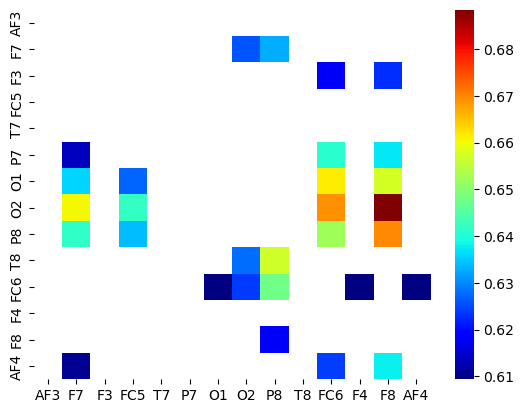

In [45]:
con=connectivity(auc_mat_gamma.flatten(),label,save_path+'gamma_auc',save_edge=save_edge,save_plot=save_plot)
index_gamma=np.where(con.flatten()>0)[0]
x=index_gamma//14
y=index_gamma%14
col_name=[label[int(x[i])] + "=>" + label[int(y[i])] +" gamma" for i in range(len(x))]

In [46]:
df_gamma = prepare_data(index_gamma,hi_gamma,lo_gamma,col_name)

/tmp/ipykernel_53631/2553286665.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_data.set_axis(col_name + ['label'], axis=1, inplace=True)


Top 150 (concat top-n features of all freq. bands)

In [47]:
df_top150=pd.concat([df_delta,df_theta,df_alpha,df_beta,df_gamma],axis=1)
display(df_top150)


AF3=>FC6 delta  AF3=>F8 delta  F7=>FC6 delta  F7=>F8 delta  \
0           0.040700       0.036336       0.035749      0.097442   
1           0.035582       0.062038       0.056746      0.084545   
2           0.027220       0.022243       0.043667      0.027667   
3           0.020475       0.038496       0.059207      0.045354   
4           0.056545       0.086591       0.054513      0.099316   
...              ...            ...            ...           ...   
1771        0.020178       0.074865       0.004147      0.029419   
1772        0.037364       0.073985       0.012175      0.039893   
1773        0.039766       0.088261       0.028493      0.098519   
1774        0.011865       0.101071       0.011850      0.089648   
1775        0.015209       0.080121       0.013700      0.101219   

      F3=>F7 delta  F3=>FC6 delta  F3=>F8 delta  FC5=>F8 delta  T7=>FC6 delta  \
0         0.065423       0.035214      0.025094       0.070526       0.044370   
1         0.097707       0.059050      0.068106       0.066172       0.054609   
2         0.057751       0.034035      0.017434       0.066910       0.014800   
3         0.083440       0.029512      0.031464       0.020170       0.012000   
4         0.100275       0.018698      0.060631       0.039222       0.064417   
...            ...            ...           ...            ...            ...   
1771      0.081017       0.008576      0.093882       0.069130       0.022705   
1772      0.084198       0.033615      0.086657       0.044281       0.028326   
1773      0.104890       0.026844      0.104788       0.100584       0.017437   
1774      0.067426       0.018669      0.182440       0.067757       0.016122   
1775      0.108733       0.029557      0.125922       0.101550       0.042109   

      T7=>F8 delta  ...  FC6=>O1 gamma  FC6=>O2 gamma  FC6=>P8 gamma  \
0         0.022240  ...       0.009836       0.003073       0.003187   
1         0.107131  ...       0.007266       0.005289       0.008216   
2         0.017396  ...       0.003800       0.001970       0.002252   
3         0.007572  ...       0.003282       0.001110       0.003052   
4         0.063175  ...       0.017917       0.008392       0.015542   
...            ...  ...            ...            ...            ...   
1771      0.124522  ...       0.009169       0.003542       0.002678   
1772      0.175047  ...       0.007739       0.004352       0.004417   
1773      0.224479  ...       0.012938       0.011539       0.007935   
1774      0.265275  ...       0.006336       0.007896       0.003678   
1775      0.186979  ...       0.011925       0.010055       0.008929   

      FC6=>F4 gamma  FC6=>AF4 gamma  F8=>P8 gamma  AF4=>F7 gamma  \
0          0.019158        0.011520      0.003614       0.017842   
1          0.018337        0.003868      0.005581       0.020506   
2          0.008869        0.002402      0.002960       0.017611   
3          0.011471        0.002447      0.006138       0.008789   
4          0.033835        0.023742      0.011149       0.017046   
...             ...             ...           ...            ...   
1771       0.003375        0.007486      0.001580       0.017341   
1772       0.009462        0.009122      0.000971       0.022739   
1773       0.006517        0.008006      0.001417       0.020678   
1774       0.009713        0.008212      0.000926       0.023951   
1775       0.005281        0.009948      0.001684       0.013405   

      AF4=>FC6 gamma  AF4=>F8 gamma  label  
0           0.007404       0.011781      1  
1           0.008268       0.011127      1  
2           0.018822       0.009306      1  
3           0.003319       0.003482      1  
4           0.012940       0.012967      1  
...              ...            ...    ...  
1771        0.003160       0.007871      0  
1772        0.011747       0.015079      0  
1773        0.010808       0.017238      0  
1774        0.004823       0.024023      0  
1775        0.003534       0.010145    

In [60]:
# df_top150.to_csv(save_path + 'df_top150.csv')

In [48]:
from_column=[col.split('=>')[0] for col in df_top150.columns[:-1]]
to_column = [col.split('=>')[1].split(' ')[0] for col in df_top150.columns[:-1]]
df_electrods=pd.DataFrame({'From':from_column,'To':to_column})
df_electrods.groupby('To').count().sort_values('From',ascending=False)

From
To       
F8     43
FC6    29
F7     28
O2     17
P8     15
O1     10
FC5     5
AF4     1
F4      1
P7      1

In [58]:
df_electrods.groupby('From').count().sort_values('To',ascending=False)

To
From    
O1    16
O2    16
FC6   15
P7    13
P8    13
F3    12
T8    12
AF4   10
AF3    9
F7     9
FC5    7
T7     7
F8     6
F4     5

In [49]:
df_top150.columns

Index(['AF3=>FC6 delta', 'AF3=>F8 delta', 'F7=>FC6 delta', 'F7=>F8 delta',
       'F3=>F7 delta', 'F3=>FC6 delta', 'F3=>F8 delta', 'FC5=>F8 delta',
       'T7=>FC6 delta', 'T7=>F8 delta',
       ...
       'FC6=>O1 gamma', 'FC6=>O2 gamma', 'FC6=>P8 gamma', 'FC6=>F4 gamma',
       'FC6=>AF4 gamma', 'F8=>P8 gamma', 'AF4=>F7 gamma', 'AF4=>FC6 gamma',
       'AF4=>F8 gamma', 'label'],
      dtype='object', length=151)

In [392]:
# # preforming feature selection for every model //////////////////TIME_CONSUMING
# import warnings
# warnings.filterwarnings("ignore")
# for model in models:
#     exec(f"feature_{model}_top150,df_results_{model}_top150={model}_with_fs(df_top150)")
#     print(10*'-')

feature1: F7=>F8 delta
ACC Updated: 0.685799650537754
feature2: FC6=>P8 alpha
ACC Updated: 0.7511237478714371
feature3: F8=>F7 theta
ACC Updated: 0.7730807364494457
feature4: FC6=>P8 gamma
ACC Updated: 0.7910918249843275
feature5: FC5=>O2 alpha
ACC Updated: 0.8012222286443443
feature6: AF3=>FC6 theta
ACC Updated: 0.8153185397279886
feature7: T7=>O2 beta
ACC Updated: 0.8271517937728138
feature8: O2=>FC5 theta
ACC Updated: 0.836717544694265
feature9: O1=>F7 gamma
ACC Updated: 0.8451651053499736
feature10: FC5=>P8 beta
ACC Updated: 0.8496667659625553
feature11: O1=>P8 alpha
ACC Updated: 0.8552932859677126
feature12: F3=>F8 beta
ACC Updated: 0.8620491114500016
feature13: F7=>F8 beta
ACC Updated: 0.865417020500896
feature14: P7=>F8 gamma
ACC Updated: 0.8682336150668915
feature15: P7=>F7 gamma
ACC Updated: 0.8693584744594673
feature16: FC6=>O2 gamma
ACC Updated: 0.8738512429029376
feature17: F3=>FC6 delta
ACC Updated: 0.8766700605112109
feature18: O2=>F7 beta
ACC Updated: 0.8800513078157721


In [393]:
# classification with selected features
for model in models:
    exec(f"acc, precision, recall, f1={model}(df_top150[feature_{model}_top150 + ['label']])")
    exec(f"results.loc[('top150','{model}')]['With FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
    exec(f"results.loc[('top150','{model}')]['With FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
    exec(f"results.loc[('top150','{model}')]['With FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
    exec(f"results.loc[('top150','{model}')]['With FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
    print(10*'-')

Accuracy SVM:  0.8952724782919921
----------
Accuracy LDA:  0.8321914306166274
----------
Accuracy RF:  0.8749938866337361
----------
Accuracy DT:  0.7983900727824041
----------


In [394]:
# classificaiton with all features
for model in models:
    exec(f"acc, precision, recall, f1={model}(df_top150)")
    exec(f"results.loc[('top150','{model}')]['Without FS','Accuracy']=str('%.2f' % (acc.mean()*100)) + '%' + ' (±' + str('%.2f' % (acc.std()*100)) + ')'")
    exec(f"results.loc[('top150','{model}')]['Without FS','Precision']=str('%.2f' % (precision.mean()*100)) + '%' + ' (±' + str('%.2f' % (precision.std()*100)) + ')'")
    exec(f"results.loc[('top150','{model}')]['Without FS','Recall']=str('%.2f' % (recall.mean()*100)) + '%' + ' (±' + str('%.2f' % (recall.std()*100)) + ')'")
    exec(f"results.loc[('top150','{model}')]['Without FS','F1-Measure']=str('%.2f' % (f1.mean()*100)) + '%' + ' (±' + str('%.2f' % ((f1.std()*100))) + ')'")
    print(10*'-')

Accuracy SVM:  0.8896392891600013
----------
Accuracy LDA:  0.8186797796520493
----------
Accuracy RF:  0.8581054344491524
----------
Accuracy DT:  0.7550740939991195
----------


In [395]:
results.loc[pd.IndexSlice[:, :], :].sort_values([("With FS","Accuracy")],ascending=False)

Without FS                                                  \
                    Accuracy       Precision          Recall      F1-Measure   
Band   Model                                                                   
delta  svm    75.51% (±2.95)  74.19% (±3.04)  78.26% (±5.26)  76.09% (±3.37)   
alpha  dt     72.86% (±2.12)  73.04% (±2.60)  72.64% (±2.81)  72.79% (±1.93)   
gamma  dt     68.63% (±2.01)  69.14% (±2.76)  67.44% (±1.80)  68.25% (±1.92)   
       rf     79.73% (±1.71)  79.59% (±1.81)  80.11% (±3.26)  79.80% (±1.61)   
       lda    76.58% (±2.09)  77.78% (±3.07)  74.68% (±2.34)  76.14% (±1.66)   
       svm    79.56% (±1.95)  79.90% (±3.31)  79.29% (±1.05)  79.54% (±1.34)   
beta   dt     70.38% (±2.44)  71.34% (±3.77)  68.37% (±4.13)  69.72% (±2.91)   
       rf     81.65% (±1.66)  82.04% (±2.45)  81.07% (±1.57)  81.54% (±1.67)   
       lda    78.04% (±1.02)  78.28% (±1.53)  77.73% (±3.47)  77.94% (±1.36)   
delta  lda    72.64% (±3.59)  74.29% (±3.73)  69.12% (±5.45)  71.56% (±4.38)   
beta   svm    82.49% (±2.21)  82.97% (±3.64)  81.88% (±3.85)  82.33% (±2.54)   
alpha  rf     81.36% (±2.03)  82.91% (±2.96)  79.01% (±2.37)  80.89% (±2.26)   
       lda    76.35% (±2.27)  74.76% (±2.55)  79.64% (±2.92)  77.09% (±2.25)   
       svm    80.80% (±1.46)  81.95% (±2.21)  79.04% (±2.74)  80.43% (±1.74)   
theta  dt     65.43% (±3.15)  66.64% (±3.13)  62.10% (±2.73)  64.26% (±2.67)   
       rf     73.76% (±1.47)  73.07% (±1.92)  75.33% (±2.51)  74.15% (±1.58)   
       lda    71.29% (±2.95)  74.04% (±3.43)  65.37% (±5.06)  69.38% (±4.08)   
       svm    76.18% (±2.76)  77.21% (±3.19)  74.28% (±3.96)  75.68% (±3.17)   
delta  dt     67.45% (±2.09)  68.64% (±3.14)  64.61% (±2.99)  66.48% (±2.03)   
       rf     75.00% (±2.02)  74.09% (±1.50)  76.75% (±4.35)  75.36% (±2.76)   
top150 svm    88.96% (±1.03)  89.10% (±2.42)  88.85% (±1.64)  88.94% (±1.11)   
       rf     85.81% (±1.20)  85.84% (±1.65)  85.81% (±2.68)  85.79% (±1.34)   
       lda    81.87% (±1.75)  82.12% (±1.79)  81.55% (±3.32)  81.79% (±1.88)   
       dt     75.51% (±1.48)  76.44% (±2.55)  74.04% (±3.42)  75.12% (±1.40)   

                     With FS                                                  
                    Accuracy       Precision          Recall      F1-Measure  
Band   Model                                                                  
delta  svm               nan             nan             nan             nan  
alpha  dt                nan             nan             nan             nan  
gamma  dt                nan             nan             nan             nan  
       rf                nan             nan             nan             nan  
       lda               nan             nan             nan             nan  
       svm               nan             nan             nan             nan  
beta   dt                nan             nan             nan             nan  
       rf                nan             nan             nan             nan  
       lda               nan             nan             nan             nan  
delta  lda               nan             nan             nan             nan  
beta   svm               nan             nan             nan             nan  
alpha  rf                nan             nan             nan             nan  
       lda               nan             nan             nan             nan  
       svm               nan             nan             nan             nan  
theta  dt                nan             nan             nan             nan  
       rf                nan             nan             nan             nan  
       lda               nan             nan             nan             nan  
       svm               nan             nan             nan             nan  
delta  dt                nan             nan             nan             nan  
       rf                nan             nan             nan             nan  
top150 svm    89.53% (±1.36)  89.49% (±2

In [396]:
results

Without FS                                                  \
                    Accuracy       Precision          Recall      F1-Measure   
Band   Model                                                                   
delta  svm    75.51% (±2.95)  74.19% (±3.04)  78.26% (±5.26)  76.09% (±3.37)   
       lda    72.64% (±3.59)  74.29% (±3.73)  69.12% (±5.45)  71.56% (±4.38)   
       rf     75.00% (±2.02)  74.09% (±1.50)  76.75% (±4.35)  75.36% (±2.76)   
       dt     67.45% (±2.09)  68.64% (±3.14)  64.61% (±2.99)  66.48% (±2.03)   
theta  svm    76.18% (±2.76)  77.21% (±3.19)  74.28% (±3.96)  75.68% (±3.17)   
       lda    71.29% (±2.95)  74.04% (±3.43)  65.37% (±5.06)  69.38% (±4.08)   
       rf     73.76% (±1.47)  73.07% (±1.92)  75.33% (±2.51)  74.15% (±1.58)   
       dt     65.43% (±3.15)  66.64% (±3.13)  62.10% (±2.73)  64.26% (±2.67)   
alpha  svm    80.80% (±1.46)  81.95% (±2.21)  79.04% (±2.74)  80.43% (±1.74)   
       lda    76.35% (±2.27)  74.76% (±2.55)  79.64% (±2.92)  77.09% (±2.25)   
       rf     81.36% (±2.03)  82.91% (±2.96)  79.01% (±2.37)  80.89% (±2.26)   
       dt     72.86% (±2.12)  73.04% (±2.60)  72.64% (±2.81)  72.79% (±1.93)   
beta   svm    82.49% (±2.21)  82.97% (±3.64)  81.88% (±3.85)  82.33% (±2.54)   
       lda    78.04% (±1.02)  78.28% (±1.53)  77.73% (±3.47)  77.94% (±1.36)   
       rf     81.65% (±1.66)  82.04% (±2.45)  81.07% (±1.57)  81.54% (±1.67)   
       dt     70.38% (±2.44)  71.34% (±3.77)  68.37% (±4.13)  69.72% (±2.91)   
gamma  svm    79.56% (±1.95)  79.90% (±3.31)  79.29% (±1.05)  79.54% (±1.34)   
       lda    76.58% (±2.09)  77.78% (±3.07)  74.68% (±2.34)  76.14% (±1.66)   
       rf     79.73% (±1.71)  79.59% (±1.81)  80.11% (±3.26)  79.80% (±1.61)   
       dt     68.63% (±2.01)  69.14% (±2.76)  67.44% (±1.80)  68.25% (±1.92)   
top150 svm    88.96% (±1.03)  89.10% (±2.42)  88.85% (±1.64)  88.94% (±1.11)   
       lda    81.87% (±1.75)  82.12% (±1.79)  81.55% (±3.32)  81.79% (±1.88)   
       rf     85.81% (±1.20)  85.84% (±1.65)  85.81% (±2.68)  85.79% (±1.34)   
       dt     75.51% (±1.48)  76.44% (±2.55)  74.04% (±3.42)  75.12% (±1.40)   

                     With FS                                                  
                    Accuracy       Precision          Recall      F1-Measure  
Band   Model                                                                  
delta  svm               nan             nan             nan             nan  
       lda               nan             nan             nan             nan  
       rf                nan             nan             nan             nan  
       dt                nan             nan             nan             nan  
theta  svm               nan             nan             nan             nan  
       lda               nan             nan             nan             nan  
       rf                nan             nan             nan             nan  
       dt                nan             nan             nan             nan  
alpha  svm               nan             nan             nan             nan  
       lda               nan             nan             nan             nan  
       rf                nan             nan             nan             nan  
       dt                nan             nan             nan             nan  
beta   svm               nan             nan             nan             nan  
       lda               nan             nan             nan             nan  
       rf                nan             nan             nan             nan  
       dt                nan             nan             nan             nan  
gamma  svm               nan             nan             nan             nan  
       lda               nan             nan             nan             nan  
       rf                nan             nan             nan             nan  
       dt                nan             nan             nan             nan  
top150 svm    89.53% (±1.36)  89.49% (±2

## mRMR

In [94]:
# Model = SVM
import pymrmr

ls_feature=list(df_top150.columns[:-1])
best_acc=-np.inf
best_feature=None
c=0
col_new_order=[df_top150.columns[-1]] + df_top150.columns[:-1].tolist() # bringing label column to first column
for n_features in range(1,151):
    selected=pymrmr.mRMR(df_top150[col_new_order], 'MIQ', n_features)
    acc_current, _, _, _=svm(df_top150[selected+['label']],print_results=False)
    acc_current=acc_current.mean()
    if best_acc<acc_current:
        best_feature=selected[:]
        best_acc=acc_current
        c+=1
        print("ACC Updated:",best_acc)



 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000


ACC Updated: 0.6052788361929068


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000
2 	 99 	 FC5=>P8 beta 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000
2 	 99 	 FC5=>P8 beta 	 0.000
ACC Updated: 0.6092202901514782


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      ma

In [95]:
# best_feature_svm=best_feature
acc_svm, precision_svm, recall_svm, f1_svm=svm(df_top150[best_feature+['label']],print_results=False)

In [96]:
precision_svm.std() * 100

2.263271998900195

In [97]:
# Model = Random forest (rf)
import pymrmr
ls_feature=list(df_top150.columns[:-1])
best_acc=-np.inf
best_feature=None
c=0
col_new_order=[df_top150.columns[-1]] + df_top150.columns[:-1].tolist() # bringing label column to first column
for n_features in range(1,151):
    selected=pymrmr.mRMR(df_top150[col_new_order], 'MIQ', n_features)
    acc_current, _, _, _=rf(df_top150[selected+['label']],print_results=False)
    acc_current=acc_current.mean()
    if best_acc<acc_current:
        best_feature=selected[:]
        best_acc=acc_current
        c+=1
        print("ACC Updated:",best_acc)



 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000
ACC Updated: 0.5343460031922886


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris

In [98]:
# best_feature_rf=best_feature
acc_rf, precision_rf, recall_rf, f1_rf=rf(df_top150[best_feature+['label']],print_results=True)

Accuracy RF:  0.8659772271549061


In [99]:
# Model = LDA
import pymrmr
ls_feature=list(df_top150.columns[:-1])
best_acc=-np.inf
best_feature=None
c=0
col_new_order=[df_top150.columns[-1]] + df_top150.columns[:-1].tolist() # bringing label column to first column
for n_features in range(1,151):
    selected=pymrmr.mRMR(df_top150[col_new_order], 'MIQ', n_features)
    acc_current, _, _, _=lda(df_top150[selected+['label']],print_results=False)
    acc_current=acc_current.mean()
    if best_acc<acc_current:
        best_feature=selected[:]
        best_acc=acc_current
        c+=1
        print("ACC Updated:",best_acc)



 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000
ACC Updated: 0.5996545392300271


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris

In [100]:
# best_feature_lda=best_feature
acc_lda, precision_lda, recall_lda, f1_lda=lda(df_top150[best_feature+['label']],print_results=True)

Accuracy LDA:  0.8209272753949234


In [59]:
# Model = Decision tree (dt)
import pymrmr
ls_feature=list(df_top150.columns[:-1])
best_acc=-np.inf
best_feature=None
c=0
col_new_order=[df_top150.columns[-1]] + df_top150.columns[:-1].tolist() # bringing label column to first column
for n_features in range(1,151):
    selected=pymrmr.mRMR(df_top150[col_new_order], 'MIQ', n_features)
    acc_current, _, _, _=dt(df_top150[selected+['label']],print_results=False)
    acc_current=acc_current.mean()
    if best_acc<acc_current:
        best_feature=selected[:]
        best_acc=acc_current
        c+=1
        print("ACC Updated:",best_acc)



 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 101 	 T7=>P8 beta 	 0.000
ACC Updated: 0.5275924007522775


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris

In [60]:
# best_feature_dt=best_feature
acc_dt, precision_dt, recall_dt, f1_dt=dt(df_top150[best_feature+['label']],print_results=True)

Accuracy DT:  0.7584486721768474


In [61]:
models2=['dt']

for model in models2:
    print("Model:",model)
    print('-'*100)
    exec(f"print('acc_mean:',acc_{model}.mean()* 100)")
    exec(f"print('acc_std:',acc_{model}.std()* 100)")
    exec(f"print(10*'--')")

    exec(f"print('precision_mean:',precision_{model}.mean()* 100)")
    exec(f"print('precision_std:',precision_{model}.std()* 100)")
    exec(f"print(10*'--')")

    exec(f"print('recall_mean:',recall_{model}.mean()* 100)")
    exec(f"print('recall_std:',recall_{model}.std()* 100)")
    exec(f"print(10*'--')")

    exec(f"print('f1_mean:',f1_{model}.mean()* 100)")
    exec(f"print('f1_std:',f1_{model}.std()* 100)")
    exec(f"print(10*'--')")

Model: dt
----------------------------------------------------------------------------------------------------
acc_mean: 75.84486721768474
acc_std: 1.3702528930395979
--------------------
precision_mean: 76.9320420547713
precision_std: 1.752994037172045
--------------------
recall_mean: 73.99449106253958
recall_std: 2.240863101799757
--------------------
f1_mean: 75.39273550360345
f1_std: 0.9762145989356312
--------------------


In [103]:
models2=['svm','lda','rf'] # done

for model in models2:
    print("Model:",model)
    print('-'*100)
    exec(f"print('acc_mean:',acc_{model}.mean()* 100)")
    exec(f"print('acc_std:',acc_{model}.std()* 100)")
    exec(f"print(10*'--')")

    exec(f"print('precision_mean:',precision_{model}.mean()* 100)")
    exec(f"print('precision_std:',precision_{model}.std()* 100)")
    exec(f"print(10*'--')")

    exec(f"print('recall_mean:',recall_{model}.mean()* 100)")
    exec(f"print('recall_std:',recall_{model}.std()* 100)")
    exec(f"print(10*'--')")

    exec(f"print('f1_mean:',f1_{model}.mean()* 100)")
    exec(f"print('f1_std:',f1_{model}.std()* 100)")
    exec(f"print(10*'--')")

Model: svm
----------------------------------------------------------------------------------------------------
acc_mean: 88.96392891600013
acc_std: 0.9662019983896738
--------------------
precision_mean: 89.09873864822738
precision_std: 2.263271998900195
--------------------
recall_mean: 88.85603128351175
recall_std: 1.825641470723625
--------------------
f1_mean: 88.94137247825358
f1_std: 1.0477847912109297
--------------------
Model: lda
----------------------------------------------------------------------------------------------------
acc_mean: 82.09272753949234
acc_std: 1.8772396504145177
--------------------
precision_mean: 82.53895718004402
precision_std: 1.6388563088155215
--------------------
recall_mean: 81.42544653829545
recall_std: 3.321922511676926
--------------------
f1_mean: 81.94398139768488
f1_std: 2.0556910540188107
--------------------
Model: rf
----------------------------------------------------------------------------------------------------
acc_mean: 86.5977227

## Relief-f

In [62]:
from ReliefF import ReliefF

In [63]:
data=np.array(df_top150.iloc[:,:-1])
target=np.array(df_top150.iloc[:,-1])

In [64]:
# SVM
best_acc_svm=np.array([-np.inf,-np.inf])
best_precision_svm=-np.inf
best_recall_svm=-np.inf
best_f1_svm=-np.inf
c=0
for i in range(1,151):
    fs = ReliefF(n_features_to_keep=i)
    X_train = fs.fit_transform(data, target)
    df_selected=pd.DataFrame(np.c_[X_train,target])
    acc_current, precision_current, recall_current, f1_current=svm(df_selected,print_results=False)
    if best_acc_svm.mean()<acc_current.mean():
        best_acc_svm=acc_current
        best_precision_svm=precision_current
        best_recall_svm=recall_current
        best_f1_svm=f1_current
        c+=1
        print("ACC Updated:",best_acc_svm.mean())

ACC Updated: 0.6013707278685027
ACC Updated: 0.6165518835837219
ACC Updated: 0.6210779976613595
ACC Updated: 0.645847134720808
ACC Updated: 0.6576937270193005
ACC Updated: 0.6666992712867412
ACC Updated: 0.6965436138664486
ACC Updated: 0.701034159267641
ACC Updated: 0.7072231089690864
ACC Updated: 0.7117158774125567
ACC Updated: 0.7173490665445476
ACC Updated: 0.7173535126291031
ACC Updated: 0.7212927435453969
ACC Updated: 0.7404442527687991
ACC Updated: 0.7409977902959758
ACC Updated: 0.7415624430345416
ACC Updated: 0.7601359612657115
ACC Updated: 0.787163709279423
ACC Updated: 0.7894134280645749
ACC Updated: 0.795044394154288
ACC Updated: 0.7984145262474601
ACC Updated: 0.8119306232965939
ACC Updated: 0.8181284651671505
ACC Updated: 0.8231925554760202
ACC Updated: 0.8310643481817737
ACC Updated: 0.8321914306166275
ACC Updated: 0.835008025182623
ACC Updated: 0.8389472560989165
ACC Updated: 0.8412036440109018
ACC Updated: 0.8423262803611999
ACC Updated: 0.8423307264457556
ACC Updated: 

In [65]:
# RF
best_acc_rf=np.array([-np.inf,-np.inf])
best_precision_rf=-np.inf
best_recall_rf=-np.inf
best_f1_rf=-np.inf
c=0
for i in range(1,151):
    fs = ReliefF(n_features_to_keep=i)
    X_train = fs.fit_transform(data, target)
    df_selected=pd.DataFrame(np.c_[X_train,target])
    acc_current, precision_current, recall_current, f1_current=rf(df_selected,print_results=False)
    if best_acc_rf.mean()<acc_current.mean():
        best_acc_rf=acc_current
        best_precision_rf=precision_current
        best_recall_rf=recall_current
        best_f1_rf=f1_current
        c+=1
        print("ACC Updated:",best_acc_rf.mean())

ACC Updated: 0.5090211055633855
ACC Updated: 0.5630632633371421
ACC Updated: 0.6081176611816803
ACC Updated: 0.626728971131573
ACC Updated: 0.6413476971505043
ACC Updated: 0.6588052481582095
ACC Updated: 0.6875158391762294
ACC Updated: 0.6875225083030629
ACC Updated: 0.6982064494902566
ACC Updated: 0.7027147792296715
ACC Updated: 0.71453469502083
ACC Updated: 0.7212971896299525
ACC Updated: 0.7556254084840186
ACC Updated: 0.7775690588083604
ACC Updated: 0.7865679339489678
ACC Updated: 0.7922144613346257
ACC Updated: 0.8017846583406323
ACC Updated: 0.8034830626408853
ACC Updated: 0.8170013827322967
ACC Updated: 0.8277053312999907
ACC Updated: 0.8282477536157783
ACC Updated: 0.8288212985234553
ACC Updated: 0.8305152567391526
ACC Updated: 0.8350146943094564
ACC Updated: 0.8355815700902999
ACC Updated: 0.8423351725303113
ACC Updated: 0.8457075276657611
ACC Updated: 0.8473859245855139
ACC Updated: 0.8485174531049232
ACC Updated: 0.8507693949323529
ACC Updated: 0.8592258477571727
ACC Updated

In [66]:
# LDA
best_acc_lda=np.array([-np.inf,-np.inf])
best_precision_lda=-np.inf
best_recall_lda=-np.inf
best_f1_lda=-np.inf
c=0
for i in range(1,151):
    fs = ReliefF(n_features_to_keep=i)
    X_train = fs.fit_transform(data, target)
    df_selected=pd.DataFrame(np.c_[X_train,target])
    acc_current, precision_current, recall_current, f1_current=lda(df_selected,print_results=False)
    if best_acc_lda.mean()<acc_current.mean():
        best_acc_lda=acc_current
        best_precision_lda=precision_current
        best_recall_lda=recall_current
        best_f1_lda=f1_current
        c+=1
        print("ACC Updated:",best_acc_lda.mean())

ACC Updated: 0.5968423907485871
ACC Updated: 0.5996412009763601
ACC Updated: 0.6080954307589022
ACC Updated: 0.6148623714525803
ACC Updated: 0.626704517666517
ACC Updated: 0.6306348564136993
ACC Updated: 0.6492239359408137
ACC Updated: 0.6570957286465674
ACC Updated: 0.6604769759511286
ACC Updated: 0.6627355869053917
ACC Updated: 0.6627378099476696
ACC Updated: 0.6649964209019327
ACC Updated: 0.6790527172245763
ACC Updated: 0.6818626426637382
ACC Updated: 0.7139678192399863
ACC Updated: 0.7370563363374044
ACC Updated: 0.7387458484685461
ACC Updated: 0.751137086125104
ACC Updated: 0.7562078455608069
ACC Updated: 0.7618343655659643
ACC Updated: 0.7640885304356717
ACC Updated: 0.7640885304356718
ACC Updated: 0.7713956704028597
ACC Updated: 0.7736453891880116
ACC Updated: 0.7742055958420216
ACC Updated: 0.775899554057719
ACC Updated: 0.7770199673657394
ACC Updated: 0.7787050334123256
ACC Updated: 0.780385653374356
ACC Updated: 0.7815127358092095
ACC Updated: 0.7826464873708968
ACC Updated:

In [67]:
# DT
best_acc_dt=np.array([-np.inf,-np.inf])
best_precision_dt=-np.inf
best_recall_dt=-np.inf
best_f1_dt=-np.inf
c=0
for i in range(1,151):
    fs = ReliefF(n_features_to_keep=i)
    X_train = fs.fit_transform(data, target)
    df_selected=pd.DataFrame(np.c_[X_train,target])
    acc_current, precision_current, recall_current, f1_current=dt(df_selected,print_results=False)
    if best_acc_dt.mean()<acc_current.mean():
        best_acc_dt=acc_current
        best_precision_dt=precision_current
        best_recall_dt=recall_current
        best_f1_dt=f1_current
        c+=1
        print("ACC Updated:",best_acc_dt.mean())

ACC Updated: 0.5377450348350724
ACC Updated: 0.5540221503932562
ACC Updated: 0.5743140803051793
ACC Updated: 0.5844689374302521
ACC Updated: 0.5855826816114389
ACC Updated: 0.5951662168711124
ACC Updated: 0.6075841310350041
ACC Updated: 0.6154470315716464
ACC Updated: 0.6199531382687836
ACC Updated: 0.6278471613973154
ACC Updated: 0.6418878964240141
ACC Updated: 0.64189234250857
ACC Updated: 0.6632602248829568
ACC Updated: 0.6880560384497392
ACC Updated: 0.6948340943548066
ACC Updated: 0.7009874753798068
ACC Updated: 0.705480243823277
ACC Updated: 0.7314075859094687
ACC Updated: 0.7375943125686364
ACC Updated: 0.7376143199491368
ACC Updated: 0.7387258410880458
ACC Updated: 0.748887367339952
ACC Updated: 0.749438681824851
ACC Updated: 0.7539559037333772
ACC Updated: 0.7544983260491648
ACC Updated: 0.7550629787877305
ACC Updated: 0.7589977636194686
ACC Updated: 0.7618276964391308


In [68]:
best_acc_lda
for model in models:
    print("Model:",model)
    print('-'*100)
    exec(f"print('acc_mean:',best_acc_{model}.mean()* 100)")
    exec(f"print('acc_std:',best_acc_{model}.std()* 100)")
    exec(f"print(10*'--')")

    exec(f"print('precision_mean:',best_precision_{model}.mean()* 100)")
    exec(f"print('precision_std:',best_precision_{model}.std()* 100)")
    exec(f"print(10*'--')")

    exec(f"print('recall_mean:',best_recall_{model}.mean()* 100)")
    exec(f"print('recall_std:',best_recall_{model}.std()* 100)")
    exec(f"print(10*'--')")

    exec(f"print('f1_mean:',best_f1_{model}.mean()* 100)")
    exec(f"print('f1_std:',best_f1_{model}.std()* 100)")
    exec(f"print(10*'--')")

Model: svm
----------------------------------------------------------------------------------------------------
acc_mean: 88.96392891600013
acc_std: 1.0326682479209663
--------------------
precision_mean: 89.10075143275701
precision_std: 2.4224560573350704
--------------------
recall_mean: 88.85428731546125
recall_std: 1.6373455701006356
--------------------
f1_mean: 88.9426278937137
f1_std: 1.1064594970043913
--------------------
Model: lda
----------------------------------------------------------------------------------------------------
acc_mean: 82.03670687409132
acc_std: 1.6481610860529203
--------------------
precision_mean: 82.71622483017013
precision_std: 1.6875600599704312
--------------------
recall_mean: 81.11626189539166
recall_std: 3.6106767402442204
--------------------
f1_mean: 81.84579120493144
f1_std: 1.7732965456867933
--------------------
Model: rf
----------------------------------------------------------------------------------------------------
acc_mean: 86.37275

# Save

In [69]:
# df_all_auc.groupby("band").count().to_csv(save_path+ f'band_importance_Navg{n_avg}_Ntop_{n_top}.csv')
results.to_csv(save_path+ f'result_Navg{n_avg}_Ntop_{n_top}.csv',float_format='%.3f')

In [70]:
# # models=['svm','lda','rf','dt']
# models=['svm']
# # bands=['delta','theta','alpha','beta','gamma','top150']
# bands=['top150']
# for band in bands:
#     for model in models:
#         exec(f'plot_results(df_results_{model}_{band},save_path+"Navg{n_avg}_Ntop_{n_top}_{model}_{band}",save_plot)')

In [51]:
with open(save_path+'svm_with_fs_best_feature', 'rb') as file_pi1:
        feature_svm_top150 = pickle.load(file_pi1)
with open(save_path+'svm_with_fs_df_results', 'rb') as file_pi1:
        df_results_svm_top150 = pickle.load(file_pi1)

with open(save_path+'lda_with_fs_best_feature', 'rb') as file_pi1:
        feature_lda_top150 = pickle.load(file_pi1)
with open(save_path+'lda_with_fs_df_results', 'rb') as file_pi1:
        df_results_lda_top150 = pickle.load(file_pi1)

with open(save_path+'rf_with_fs_best_feature', 'rb') as file_pi1:
        feature_rf_top150 = pickle.load(file_pi1)
with open(save_path+'rf_with_fs_df_results', 'rb') as file_pi1:
        df_results_rf_top150 = pickle.load(file_pi1)

with open(save_path+'dt_with_fs_best_feature', 'rb') as file_pi1:
        feature_dt_top150 = pickle.load(file_pi1)
with open(save_path+'dt_with_fs_df_results', 'rb') as file_pi1:
        df_results_dt_top150 = pickle.load(file_pi1)

In [59]:
df_plot=pd.DataFrame([])
df_results_svm_top150
for i in df_results_svm_top150['Features'].unique()[:150:2]:
    df_plot[f'{int(i+2)}']=pd.Series(df_results_svm_top150[df_results_svm_top150['Features']==i]['Accouracy'].values)
df_plot

2         4         6         8        10        12        14  \
0    0.639116  0.757333  0.795047  0.807436  0.834463  0.843476  0.860362   
1    0.640781  0.752818  0.786030  0.817566  0.837280  0.848542  0.859793   
2    0.640209  0.758446  0.783202  0.809116  0.836142  0.841788  0.859226   
3    0.685800  0.761261  0.787719  0.815312  0.837831  0.848537  0.852474   
4    0.630037  0.763508  0.781526  0.814754  0.835595  0.847413  0.859235   
..        ...       ...       ...       ...       ...       ...       ...   
145  0.594046  0.760143  0.788849       NaN       NaN       NaN       NaN   
146  0.585567  0.759582       NaN       NaN       NaN       NaN       NaN   
147  0.600811  0.755083       NaN       NaN       NaN       NaN       NaN   
148  0.591234       NaN       NaN       NaN       NaN       NaN       NaN   
149  0.601371       NaN       NaN       NaN       NaN       NaN       NaN   

           16        18        20  ...       132       134       136  \
0    0.865993  0.866546  0.874418  ...  0.890769  0.890204  0.890766   
1    0.858655  0.867665  0.872164  ...  0.890764  0.892451  0.891887   
2    0.865419  0.869914  0.870472  ...  0.890762  0.890762  0.889637   
3    0.864288  0.864274  0.876663  ...  0.889075  0.890197  0.891329   
4    0.865988  0.867107  0.867662  ...  0.891324  0.891885  0.890202   
..        ...       ...       ...  ...       ...       ...       ...   
145       NaN       NaN       NaN  ...       NaN       NaN       NaN   
146       NaN       NaN       NaN  ...       NaN       NaN       NaN   
147       NaN       NaN       NaN  ...       NaN       NaN       NaN   
148       NaN       NaN       NaN  ...       NaN       NaN       NaN   
149       NaN       NaN       NaN  ...       NaN       NaN       NaN   

          138       140       142       144       146       148       150  
0    0.890204  0.889075  0.890204  0.890766  0.890202  0.890766  0.887950  
1    0.891331  0.886827  0.888514  0.889637  0.890762  0.890202  0.888512  
2    0.887952  0.889075  0.888514  0.893581  0.891329  0.891889       NaN  
3    0.890764  0.891327  0.890769  0.891893  0.890202  0.890764       NaN  
4    0.891327  0.888512  0.889081  0.892454  0.892454       NaN       NaN  
..        ...       ...       ...       ...       ...       ...       ...  
145       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
146       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
147       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
148       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
149       NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[150 rows x 75 columns]

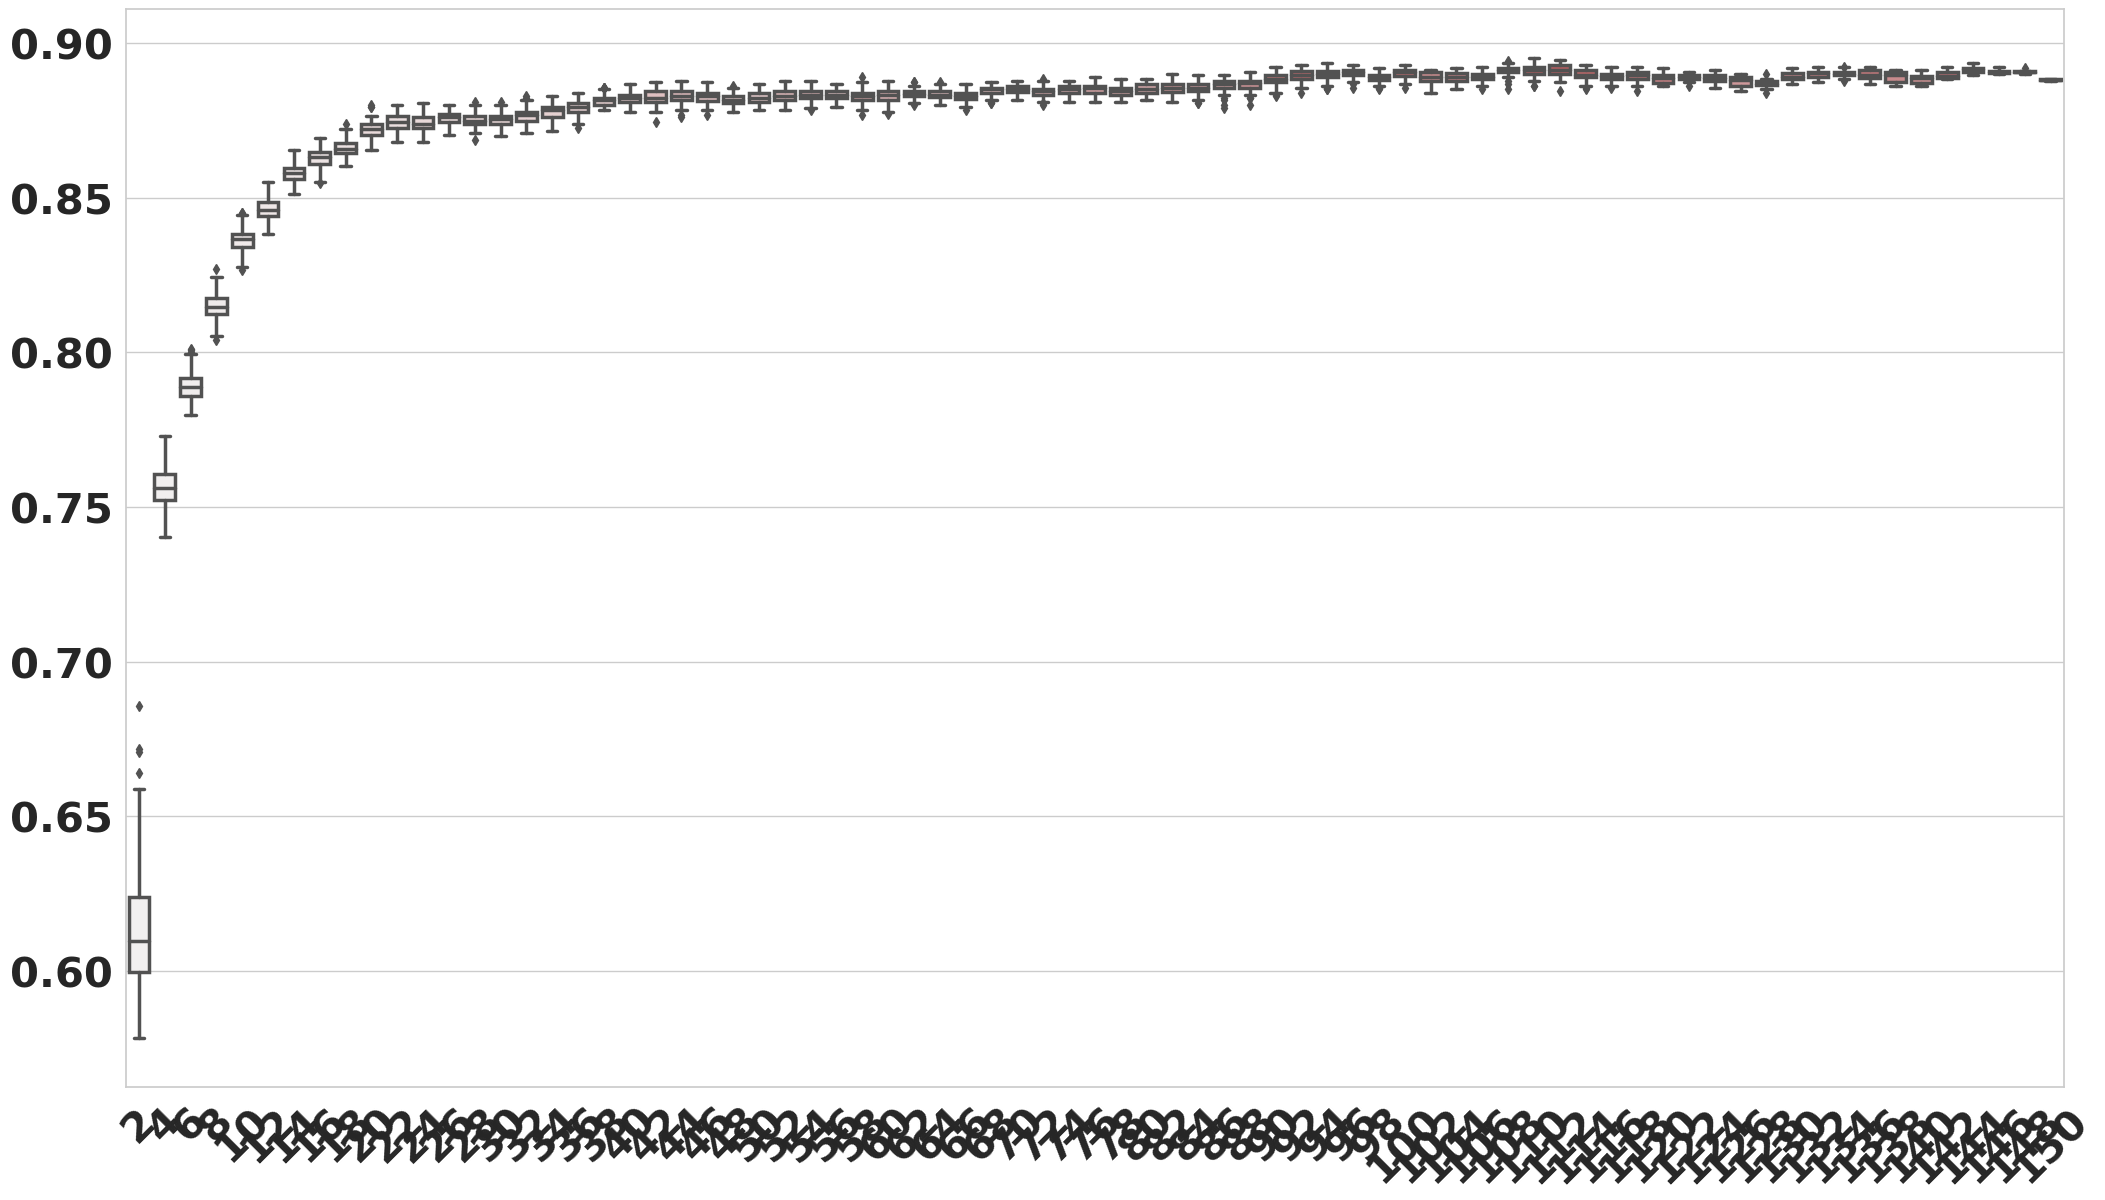

In [60]:
from matplotlib import rcParams

# figure size in inches
sns.set(style="whitegrid", font_scale=1.5)
rcParams['figure.figsize'] = 25,14
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
data=np.array(df_plot)
np.nan_to_num(data,0)
max_col= data.max(axis=0)
rank = max_col.argsort()[::-1].argsort()
pal = sns.color_palette("light:r", len(max_col))
ax = sns.boxplot(data=df_plot,palette=np.array(pal[::-1])[rank],linewidth=2.5)
# ax.axes.set_title("Title",fontsize=50)
# ax.set_xlabel("X Label",fontsize=30)
# ax.set_ylabel("Y Label",fontsize=20)
ax.tick_params(labelsize=30)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig(save_fig+"svm_fs_150_till40.svg")

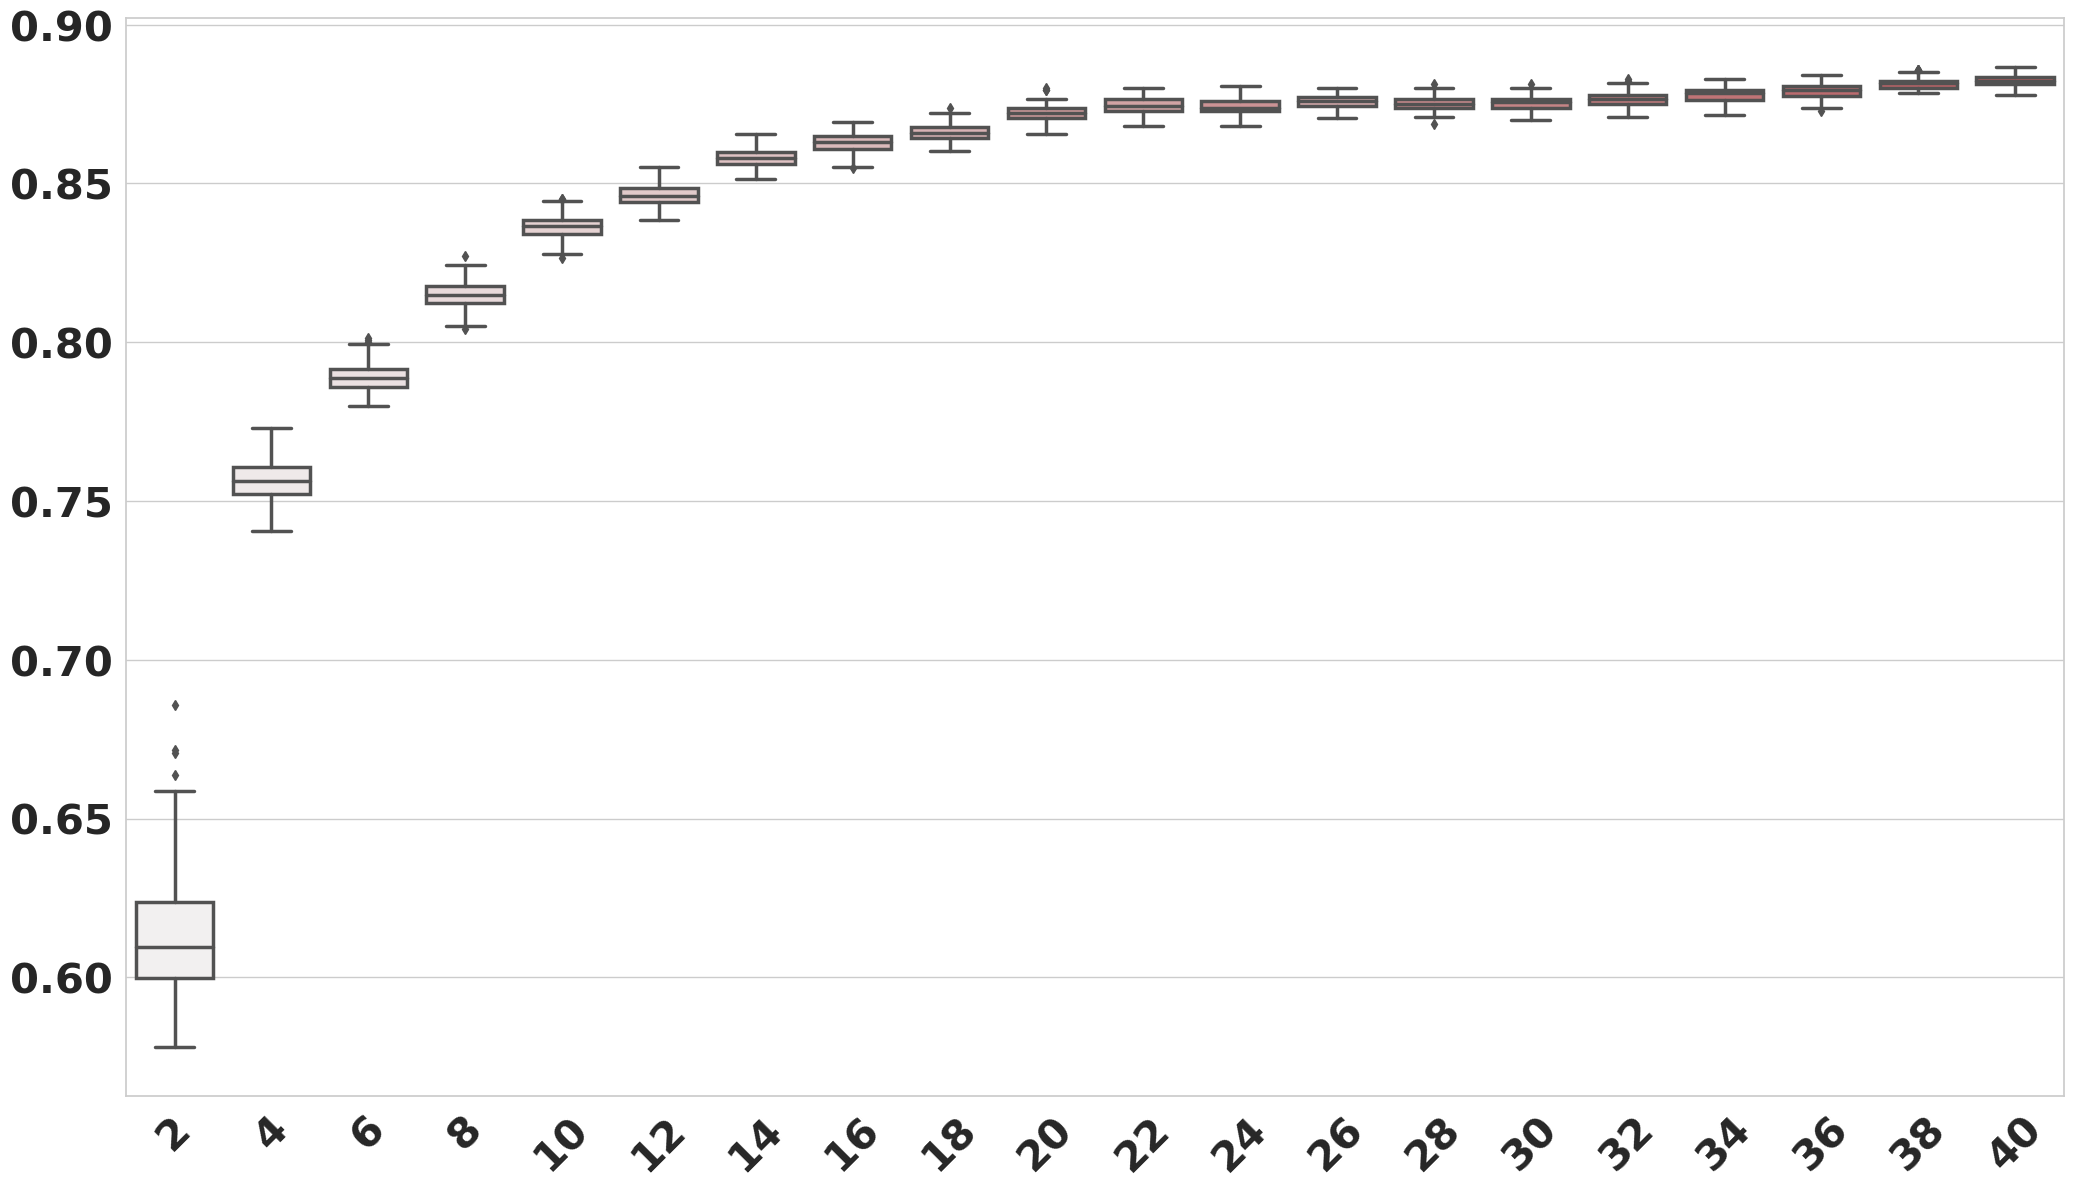

In [74]:
from matplotlib import rcParams

# figure size in inches
sns.set(style="whitegrid", font_scale=1.5)
rcParams['figure.figsize'] = 25,14
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
data=np.array(df_plot)
np.nan_to_num(data,0)
max_col= data.max(axis=0)
rank = max_col.argsort()[::-1].argsort()
pal = sns.color_palette("light:r", len(max_col))
ax = sns.boxplot(data=df_plot,palette=np.array(pal[::-1])[rank],linewidth=2.5)
# ax.axes.set_title("Title",fontsize=50)
# ax.set_xlabel("X Label",fontsize=30)
# ax.set_ylabel("Y Label",fontsize=20)
ax.tick_params(labelsize=30)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig(save_fig+"svm_fs_150_till40.svg")

# Delta

In [75]:
print("SVM:",', '.join(feature_svm_delta), "\nNumber of connections:", len(feature_svm_delta))
print("\nLDA:",', '.join(feature_lda_delta), "\nNumber of connections:", len(feature_lda_delta))
print("\nRF:",', '.join(feature_rf_delta), "\nNumber of connections:", len(feature_rf_delta))
print("\nDT:",', '.join(feature_dt_delta), "\nNumber of connections:", len(feature_dt_delta))

NameError: name 'feature_svm_delta' is not defined

In [ ]:
set.intersection(*map(set,[feature_svm_delta,feature_lda_delta,feature_rf_delta,feature_dt_delta]))

# Theta

In [ ]:
print("SVM:",', '.join(feature_svm_theta), "\nNumber of connections:", len(feature_svm_theta))
print("\nLDA:",', '.join(feature_lda_theta), "\nNumber of connections:", len(feature_lda_theta))
print("\nRF:",', '.join(feature_rf_theta), "\nNumber of connections:", len(feature_rf_theta))
print("\nDT:",', '.join(feature_dt_theta), "\nNumber of connections:", len(feature_dt_theta))

In [ ]:
set.intersection(*map(set,[feature_svm_theta,feature_lda_theta,feature_rf_theta,feature_dt_theta]))

# Alpha

In [ ]:
print("SVM:",', '.join(feature_svm_alpha), "\nNumber of connections:", len(feature_svm_alpha))
print("\nLDA:",', '.join(feature_lda_alpha), "\nNumber of connections:", len(feature_lda_alpha))
print("\nRF:",', '.join(feature_rf_alpha), "\nNumber of connections:", len(feature_rf_alpha))
print("\nDT:",', '.join(feature_dt_alpha), "\nNumber of connections:", len(feature_dt_alpha))

In [ ]:
set.intersection(*map(set,[feature_svm_alpha,feature_lda_alpha,feature_rf_alpha,feature_dt_alpha]))

# Beta

In [ ]:
print("SVM:",', '.join(feature_svm_beta), "\nNumber of connections:", len(feature_svm_beta))
print("\nLDA:",', '.join(feature_lda_beta), "\nNumber of connections:", len(feature_lda_beta))
print("\nRF:",', '.join(feature_rf_beta), "\nNumber of connections:", len(feature_rf_beta))
print("\nDT:",', '.join(feature_dt_beta), "\nNumber of connections:", len(feature_dt_beta))

In [ ]:
set.intersection(*map(set,[feature_svm_beta,feature_lda_beta,feature_rf_beta,feature_dt_beta]))

# Gamma

In [ ]:
print("SVM:",', '.join(feature_svm_gamma), "\nNumber of connections:", len(feature_svm_gamma))
print("\nLDA:",', '.join(feature_lda_gamma), "\nNumber of connections:", len(feature_lda_gamma))
print("\nRF:",', '.join(feature_rf_gamma), "\nNumber of connections:", len(feature_rf_gamma))
print("\nDT:",', '.join(feature_dt_gamma), "\nNumber of connections:", len(feature_dt_gamma))

In [ ]:
set.intersection(*map(set,[feature_svm_gamma,feature_lda_gamma,feature_rf_gamma,feature_dt_gamma]))

# Top150

In [80]:
print("SVM:",', '.join(feature_svm_top150), "\nNumber of connections:", len(feature_svm_top150))
print("\nLDA:",', '.join(feature_lda_top150), "\nNumber of connections:", len(feature_lda_top150))
print("\nRF:",', '.join(feature_rf_top150), "\nNumber of connections:", len(feature_rf_top150))
print("\nDT:",', '.join(feature_dt_top150), "\nNumber of connections:", len(feature_dt_top150))

SVM: F7=>F8 delta, FC6=>P8 alpha, F8=>F7 theta, FC6=>P8 gamma, FC5=>O2 alpha, AF3=>FC6 theta, T7=>O2 beta, O2=>FC5 theta, O1=>F7 gamma, FC5=>P8 beta, O1=>P8 alpha, F3=>F8 beta, F7=>F8 beta, P7=>F8 gamma, P7=>F7 gamma, O1=>FC5 gamma, FC6=>O2 gamma, F3=>FC6 delta, O2=>F7 beta, F3=>P8 alpha, FC5=>P8 alpha, T8=>F7 theta, FC6=>O2 beta, AF3=>FC6 delta, FC6=>P8 beta, F8=>O1 alpha, F8=>P8 gamma, AF4=>FC6 delta, T8=>O2 beta, T7=>P8 beta, F3=>F8 gamma, F8=>O2 alpha, O2=>FC5 gamma, O2=>P8 alpha, AF4=>FC6 theta, FC6=>O1 gamma, FC6=>F7 delta, AF3=>FC6 beta, FC6=>O2 alpha, T8=>P8 alpha, O1=>F7 delta, F3=>FC6 gamma, T7=>O1 alpha, P7=>F8 theta, P8=>FC6 gamma, P7=>FC6 delta, P7=>F8 delta, O2=>F8 gamma, O2=>F8 theta, AF4=>F8 theta, P8=>FC5 gamma, P8=>FC6 delta, FC6=>O1 alpha, FC5=>O1 alpha, O1=>F8 theta, FC5=>O2 beta, F3=>O2 alpha, P8=>F8 delta, AF4=>F7 gamma, FC6=>F8 delta, P8=>F8 theta, P7=>F7 beta, O2=>F8 delta, P7=>FC6 theta, P8=>FC6 theta, AF3=>F8 alpha, P8=>F7 beta, T8=>F8 theta, T7=>F8 theta, O1=

In [81]:
set.intersection(*map(set,[feature_svm_top150,feature_rf_top150]))

{'AF3=>FC6 beta',
 'AF3=>FC6 delta',
 'AF4=>FC6 theta',
 'F3=>O2 alpha',
 'F7=>F8 beta',
 'F7=>F8 delta',
 'F7=>FC6 theta',
 'F8=>F7 alpha',
 'F8=>F7 delta',
 'FC5=>P8 alpha',
 'FC6=>F8 delta',
 'FC6=>O1 alpha',
 'FC6=>O2 alpha',
 'FC6=>O2 beta',
 'FC6=>O2 gamma',
 'FC6=>P8 alpha',
 'O1=>F7 gamma',
 'O1=>F7 theta',
 'O1=>F8 delta',
 'O1=>O1 alpha',
 'O1=>P8 alpha',
 'O2=>F8 gamma',
 'O2=>F8 theta',
 'O2=>FC5 theta',
 'P7=>FC6 delta',
 'P7=>O1 alpha',
 'P7=>O2 alpha',
 'P8=>FC6 gamma',
 'T7=>FC6 delta',
 'T7=>P8 beta',
 'T8=>F7 delta',
 'T8=>F8 theta',
 'T8=>O2 beta',
 'T8=>P8 alpha'}

# ?

In [83]:
df_selected_feature=pd.DataFrame(feature_svm_top150)
df_selected_feature["From"]=df_selected_feature[0].apply(lambda x:(x.split(' ')[0]).split("=>")[0])
df_selected_feature["To"]=df_selected_feature[0].apply(lambda x:(x.split(' ')[0]).split("=>")[1])
df_selected_feature['connection']=df_selected_feature[0].apply(lambda x:x.split(' ')[0])
df_selected_feature['band']=df_selected_feature[0].apply(lambda x:x.split(' ')[1])
del df_selected_feature[0]

In [84]:
df_selected_feature

From   To connection   band
0     F7   F8     F7=>F8  delta
1    FC6   P8    FC6=>P8  alpha
2     F8   F7     F8=>F7  theta
3    FC6   P8    FC6=>P8  gamma
4    FC5   O2    FC5=>O2  alpha
..   ...  ...        ...    ...
104   O1  FC6    O1=>FC6   beta
105   F3   F8     F3=>F8  delta
106   P8   F7     P8=>F7  delta
107   O2  FC6    O2=>FC6  gamma
108   O2  FC6    O2=>FC6  delta

[109 rows x 4 columns]

In [85]:
df_selected_feature.groupby('To').count().sort_values('band',ascending=False)

From  connection  band
To                         
F8     33          33    33
F7     21          21    21
FC6    20          20    20
P8     12          12    12
O2     11          11    11
O1      7           7     7
FC5     5           5     5

In [86]:
df_selected_feature.groupby('From').count().sort_values('band',ascending=False)

To  connection  band
From                      
O1    14          14    14
O2    12          12    12
P8    12          12    12
FC6   11          11    11
P7    10          10    10
AF3    8           8     8
F3     8           8     8
T8     8           8     8
F8     6           6     6
T7     6           6     6
AF4    5           5     5
FC5    5           5     5
F7     3           3     3
F4     1           1     1

In [87]:
df_selected_feature.groupby('band').count().sort_values('To',ascending=False)

From  To  connection
band                       
delta    24  24          24
beta     23  23          23
alpha    21  21          21
theta    21  21          21
gamma    20  20          20